### Name: Silas Kati
### x500: kati0012

## Imports

In [207]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import mpl_scatter_density
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import layers, Sequential, backend
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [171]:
# %% Importing Cartopy to visualize Earth data
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
import os
import matplotlib        as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.io import loadmat

## Dataset Preparation

In [172]:
dir_path = "C:\\Users\\silas\\PycharmProjects\\Project\\Dataset"

In [173]:
dataset = "sat_dat_data.csv"

In [174]:
df = pd.read_csv(os.path.join(dir_path, dataset), low_memory=False)

In [175]:
df.size

412110231

In [132]:
df.shape

(31700787, 13)

In [8]:
len(df)

31700787

In [ ]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700787 entries, 0 to 31700786
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   density       float64
 1   snowtemp      float64
 2   soiltemp      float64
 3   omega         float64
 4   Tbh           float64
 5   Tbv           float64
 6   cf            float64
 7   h             float64
 8   bulk_density  float64
 9   lat           float64
 10  lon           float64
 11  date          object 
 12  voc           float64
dtypes: float64(12), object(1)
memory usage: 4.8 GB


In [176]:
df.rename(columns={'density': 'snow_density',
                   'snowtemp': 'snow_temp',
                   'soiltemp': 'soil_temp',
                   'voc': 'vod'}, inplace=True)

In [177]:
df.head()

snow_density   snow_temp   soil_temp     omega         Tbh         Tbv  \
0    158.320411  268.206835  273.037231  0.077934  250.853485  255.755310   
1    161.904102  270.752674  272.944916  0.078347  252.357315  255.754684   
2    163.183896  270.971431  272.960205  0.079091  254.316711  257.457397   
3    164.070027  271.314168  272.987762  0.079008  254.165604  258.057922   
4    158.706063  269.161864  272.945801  0.079000  250.542023  254.916229   

         cf         h  bulk_density        lat        lon        date  \
0  0.167626  1.250319      0.959070  62.684110 -160.44087  01_01_2019   
1  0.170824  1.239644      0.973190  62.532246 -160.44087  01_01_2019   
2  0.176738  1.237796      0.997815  62.381150 -160.44087  01_01_2019   
3  0.165714  1.237237      0.981988  62.230810 -160.44087  01_01_2019   
4  0.166220  1.237293      0.953300  62.684110 -160.34750  01_01_2019   

        vod  
0  0.360216  
1  0.343348  
2  0.363338  
3  0.360973  
4  0.359798

### Check to see what scaling metric to use (Standardization/Normalization)

In [ ]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise the data should be normalized.

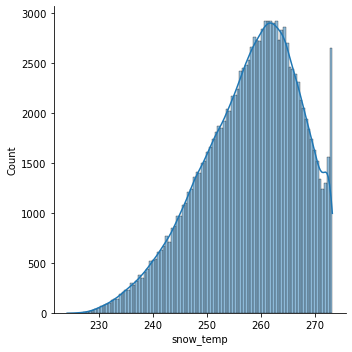

In [ ]:
sns.displot(X_train["snow_temp"].sample(frac = 0.01), kde=True)

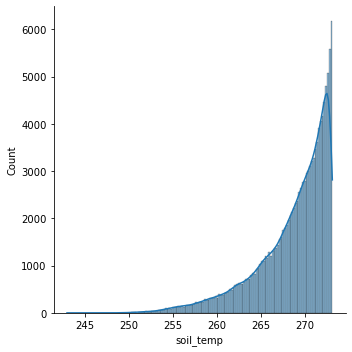

In [ ]:
sns.displot(X_train["soil_temp"].sample(frac = 0.01), kde=True)

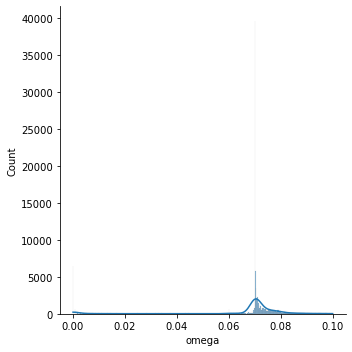

In [ ]:
sns.displot(X_train["omega"].sample(frac = 0.01), kde=True)

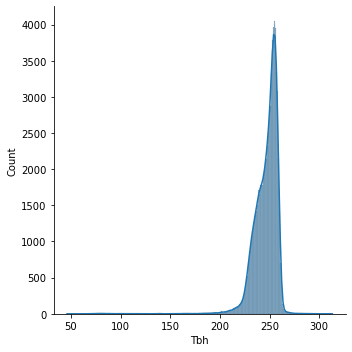

In [ ]:
sns.displot(X_train["Tbh"].sample(frac = 0.01), kde=True)

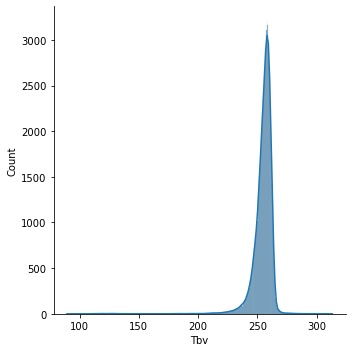

In [ ]:
sns.displot(X_train["Tbv"].sample(frac = 0.01), kde=True)

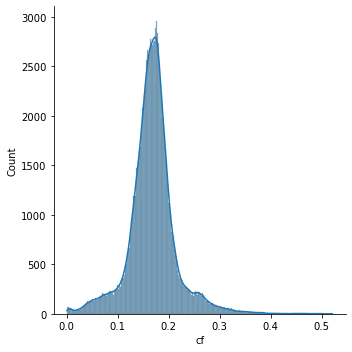

In [ ]:
sns.displot(X_train["cf"].sample(frac = 0.01), kde=True)

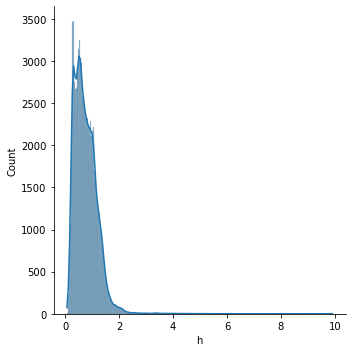

In [ ]:
sns.displot(X_train["h"].sample(frac = 0.01), kde=True)

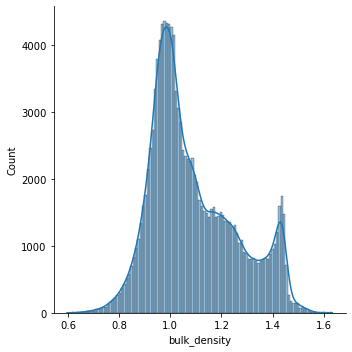

In [ ]:
sns.displot(X_train["bulk_density"].sample(frac = 0.01), kde=True)

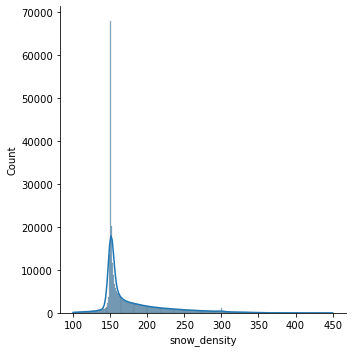

In [11]:
sns.displot(df["snow_density"].sample(frac = 0.01), kde=True)

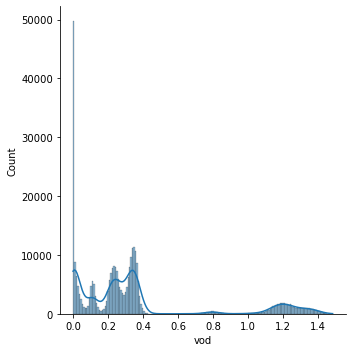

In [13]:
sns.displot(df["vod"].sample(frac = 0.01), kde=True)

### Normalizing Data

In [9]:
scaler = MinMaxScaler() 

#### Take 2019 and do train, val and test split

In [10]:
df1 = df[df["date"].apply(lambda x: x.split('_')[2] == '2019')]

In [11]:
df1.head()

snow_density   snow_temp   soil_temp     omega         Tbh         Tbv  \
0    158.320411  268.206835  273.037231  0.077934  250.853485  255.755310   
1    161.904102  270.752674  272.944916  0.078347  252.357315  255.754684   
2    163.183896  270.971431  272.960205  0.079091  254.316711  257.457397   
3    164.070027  271.314168  272.987762  0.079008  254.165604  258.057922   
4    158.706063  269.161864  272.945801  0.079000  250.542023  254.916229   

         cf         h  bulk_density        lat        lon        date  \
0  0.167626  1.250319      0.959070  62.684110 -160.44087  01_01_2019   
1  0.170824  1.239644      0.973190  62.532246 -160.44087  01_01_2019   
2  0.176738  1.237796      0.997815  62.381150 -160.44087  01_01_2019   
3  0.165714  1.237237      0.981988  62.230810 -160.44087  01_01_2019   
4  0.166220  1.237293      0.953300  62.684110 -160.34750  01_01_2019   

        vod  
0  0.360216  
1  0.343348  
2  0.363338  
3  0.360973  
4  0.359798

In [12]:
X = df1[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
y = df1[['snow_density', 'vod']]

In [13]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=True, random_state=0)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=0)

In [16]:
X_train.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
2089546    0.446222   0.864474  0.716529  0.714190  0.703754  0.283097   
10658271   0.839328   0.952501  0.714876  0.705352  0.697470  0.281405   
12957864   0.855734   0.713221  0.700000  0.691593  0.702622  0.345943   
6727656    0.649392   0.873439  0.703540  0.693865  0.688861  0.849350   
6964933    0.620074   0.983297  0.752065  0.713550  0.716695  0.211485   

                 h       lat       lon  bulk_density  
2089546   0.118298  0.808949  0.862516      0.403256  
10658271  0.143197  0.722732  0.616083      0.524331  
12957864  0.081108  0.921965  0.808301      0.309782  
6727656   0.032633  0.811663  0.230350      0.691237  
6964933   0.086461  0.816244  0.944747      0.271069

In [17]:
X_val.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
1275179    0.722513   0.963457  0.787179  0.702527  0.705328  0.332085   
15684937   0.517122   0.981167  0.700000  0.721264  0.713097  0.353128   
4736480    0.709313   0.770214  0.000000  0.658007  0.696870  0.125820   
7573681    0.792216   0.742575  0.700826  0.728822  0.718467  0.344461   
17643337   0.512028   0.928816  0.700000  0.728618  0.719230  0.326776   

                 h       lat       lon  bulk_density  
1275179   0.079345  0.821841  0.307912      0.437071  
15684937  0.074024  0.800077  0.869261      0.416843  
4736480   0.038177  0.732056  0.753048      0.811994  
7573681   0.058004  0.785551  0.843580      0.461381  
17643337  0.100793  0.835366  0.838911      0.428781

In [18]:
X_test.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
8175713    0.689661   0.898243  0.700000  0.719632  0.716880  0.315937   
18055958   0.750584   0.919998  0.708403  0.691154  0.690761  0.359609   
4853484    0.627939   0.984761  0.779338  0.717008  0.719574  0.451925   
16883108   0.460363   0.940657  0.701653  0.738804  0.722278  0.320924   
44884      0.696316   0.804377  0.000000  0.640849  0.696834  0.092715   

                 h       lat       lon  bulk_density  
8175713   0.106072  0.832409  0.873930      0.449685  
18055958  0.011335  0.832409  0.194812      0.551537  
4853484   0.040825  0.773244  0.262776      0.542885  
16883108  0.108938  0.819029  0.847211      0.465421  
44884     0.032792  0.708750  0.750195      0.823778

#### Take whole of 2019 as train and whole 2020 as test

In [9]:
df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']] = scaler.fit_transform(df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']])


In [16]:
df.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   0.908916   0.998302  0.779338  0.710750  0.708752  0.305672   
1    161.904102   0.955726   0.995804  0.783470  0.715650  0.708749  0.311526   
2    163.183896   0.959748   0.996218  0.790908  0.722035  0.714708  0.322348   
3    164.070027   0.966050   0.996963  0.790081  0.721543  0.716810  0.302173   
4    158.706063   0.926476   0.995828  0.789999  0.709735  0.705815  0.303099   

          h  bulk_density       lat       lon        date       vod  
0  0.124832      0.408674  0.863969  0.054215  01_01_2019  0.360216  
1  0.123756      0.421018  0.862857  0.054215  01_01_2019  0.343348  
2  0.123569      0.442547  0.861749  0.054215  01_01_2019  0.363338  
3  0.123513      0.428711  0.860648  0.054215  01_01_2019  0.360973  
4  0.123518      0.403630  0.863969  0.054475  01_01_2019  0.359798

In [17]:
train = df[df["date"].apply(lambda x: x.split('_')[2] == '2019')]

In [18]:
train.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   0.908916   0.998302  0.779338  0.710750  0.708752  0.305672   
1    161.904102   0.955726   0.995804  0.783470  0.715650  0.708749  0.311526   
2    163.183896   0.959748   0.996218  0.790908  0.722035  0.714708  0.322348   
3    164.070027   0.966050   0.996963  0.790081  0.721543  0.716810  0.302173   
4    158.706063   0.926476   0.995828  0.789999  0.709735  0.705815  0.303099   

          h  bulk_density       lat       lon        date       vod  
0  0.124832      0.408674  0.863969  0.054215  01_01_2019  0.360216  
1  0.123756      0.421018  0.862857  0.054215  01_01_2019  0.343348  
2  0.123569      0.442547  0.861749  0.054215  01_01_2019  0.363338  
3  0.123513      0.428711  0.860648  0.054215  01_01_2019  0.360973  
4  0.123518      0.403630  0.863969  0.054475  01_01_2019  0.359798

In [19]:
X = train[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
y = train[['snow_density', 'vod']]

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)

In [21]:
test = df[df["date"].apply(lambda x: x.split('_')[2] == '2020')]

In [22]:
test.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv  \
18329587    179.471841   0.605666   0.979289  0.725619  0.710505  0.715126   
18329588    176.776952   0.608976   0.971580  0.746666  0.701298  0.703409   
18329589    181.312867   0.594961   0.918358  0.745378  0.709829  0.718960   
18329590    183.489251   0.589092   0.946560  0.737288  0.713899  0.722697   
18329591    182.247955   0.567396   0.862735  0.745613  0.695790  0.703448   

                cf         h  bulk_density       lat       lon        date  \
18329587  0.305186  0.113270      0.267135  0.860648  0.047730  01_01_2020   
18329588  0.334429  0.104657      0.309242  0.859552  0.047730  01_01_2020   
18329589  0.299206  0.105855      0.333763  0.860648  0.048508  01_01_2020   
18329590  0.275514  0.112478      0.306441  0.861749  0.048768  01_01_2020   
18329591  0.363539  0.096604      0.392176  0.858461  0.049287  01_01_2020   

               vod  
18329587  0.136579  
18329588  0.371299  
18329589  1.187509  
18329590  0.367274  
18329591  0.243427

In [23]:
X_test = test[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
y_test = test[['snow_density', 'vod']]

In [24]:
X_train.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
17720940   0.781561   0.951139  0.709649  0.723968  0.717705  0.285109   
11233780   0.907268   0.954701  0.728440  0.722639  0.728003  0.219747   
2485422    0.823962   0.874849  0.700000  0.639702  0.634277  0.307740   
1154291    0.518025   0.836228  0.700000  0.711560  0.706707  0.340568   
6723943    0.641780   0.919108  0.710169  0.681761  0.675271  0.397789   

                 h       lat       lon  bulk_density  
17720940  0.034816  0.843706  0.171725      0.571699  
11233780  0.116229  0.846791  0.121920      0.428076  
2485422   0.339076  0.761002  0.242283      0.640580  
1154291   0.082276  0.801309  0.869780      0.404503  
6723943   0.025987  0.814736  0.215305      0.602589

In [25]:
X_val.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
8175713    0.689661   0.915354  0.700000  0.719959  0.717871  0.315937   
18055958   0.750584   0.933451  0.708403  0.691514  0.692158  0.359609   
4853484    0.627939   0.987323  0.779338  0.717337  0.720523  0.451925   
16883108   0.460363   0.950636  0.701653  0.739108  0.723185  0.320924   
44884      0.696316   0.837272  0.000000  0.641268  0.698137  0.092715   

                 h       lat       lon  bulk_density  
8175713   0.106072  0.832710  0.873930      0.449685  
18055958  0.011335  0.832710  0.194812      0.551537  
4853484   0.040825  0.773650  0.262776      0.542885  
16883108  0.108938  0.819353  0.847211      0.465421  
44884     0.032792  0.709272  0.750195      0.823778

In [26]:
X_test.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
18329587   0.605666   0.979289  0.725619  0.710505  0.715126  0.305186   
18329588   0.608976   0.971580  0.746666  0.701298  0.703409  0.334429   
18329589   0.594961   0.918358  0.745378  0.709829  0.718960  0.299206   
18329590   0.589092   0.946560  0.737288  0.713899  0.722697  0.275514   
18329591   0.567396   0.862735  0.745613  0.695790  0.703448  0.363539   

                 h       lat       lon  bulk_density  
18329587  0.113270  0.860648  0.047730      0.267135  
18329588  0.104657  0.859552  0.047730      0.309242  
18329589  0.105855  0.860648  0.048508      0.333763  
18329590  0.112478  0.861749  0.048768      0.306441  
18329591  0.096604  0.858461  0.049287      0.392176

### Standardizing Data

In [49]:
scaler = StandardScaler() 

#### Take 2019 and do train, val and test split

In [34]:
df1 = df[df["date"].apply(lambda x: x.split('_')[2] == '2019')]

In [35]:
df1.head()

snow_density   snow_temp   soil_temp     omega         Tbh         Tbv  \
0    158.320411  268.206835  273.037231  0.077934  250.853485  255.755310   
1    161.904102  270.752674  272.944916  0.078347  252.357315  255.754684   
2    163.183896  270.971431  272.960205  0.079091  254.316711  257.457397   
3    164.070027  271.314168  272.987762  0.079008  254.165604  258.057922   
4    158.706063  269.161864  272.945801  0.079000  250.542023  254.916229   

         cf         h  bulk_density        lat        lon        date  \
0  0.167626  1.250319      0.959070  62.684110 -160.44087  01_01_2019   
1  0.170824  1.239644      0.973190  62.532246 -160.44087  01_01_2019   
2  0.176738  1.237796      0.997815  62.381150 -160.44087  01_01_2019   
3  0.165714  1.237237      0.981988  62.230810 -160.44087  01_01_2019   
4  0.166220  1.237293      0.953300  62.684110 -160.34750  01_01_2019   

        vod  
0  0.360216  
1  0.343348  
2  0.363338  
3  0.360973  
4  0.359798

In [36]:
X = df1[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
y = df1[['snow_density', 'vod']]

In [37]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=True, random_state=0)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=0)

In [40]:
X_train.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
2089546   -1.639246   0.070083  0.273838  0.443092  0.004348 -0.274919   
10658271   0.710560   0.729326  0.266020  0.232509 -0.186283 -0.294598   
12957864   0.808625  -1.062674  0.195653 -0.095313 -0.029986  0.456023   
6727656   -0.424794   0.137222  0.212398 -0.041187 -0.447427  6.310912   
6964933   -0.600042   0.959964  0.441936  0.427836  0.396928 -1.107796   

                 h       lat       lon  bulk_density  
2089546   0.871485  0.143139  0.886104     -0.806772  
10658271  1.389465 -0.958981  0.035201      0.018635  
12957864  0.097782  1.587818  0.698906     -1.444013  
6727656  -0.910665  0.177834 -1.296686      1.156480  
6964933   0.209159  0.236392  1.170037     -1.707925

In [41]:
X_val.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
1275179    0.012293   0.811380  0.608029  0.165211  0.052106  0.294841   
15684937  -1.215440   0.944008  0.195653  0.611631  0.287769  0.539589   
4736480   -0.066612  -0.635845 -3.115520 -0.895539 -0.204481 -2.104134   
7573681    0.428941  -0.842839  0.199562  0.791700  0.450666  0.438781   
17643337  -1.245892   0.551946  0.195653  0.786844  0.473824  0.233095   

                 h       lat       lon  bulk_density  
1275179   0.061114  0.307933 -1.028875     -0.576246  
15684937 -0.049581  0.029722  0.909392     -0.714141  
4736480  -0.795327 -0.839785  0.508124      1.979717  
7573681  -0.382862 -0.155963  0.820719     -0.410518  
17643337  0.507321  0.480830  0.804597     -0.632761

In [42]:
X_test.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
8175713   -0.184082   0.322982  0.195653  0.572746  0.402523  0.107029   
18055958   0.180086   0.485908  0.235403 -0.105776 -0.389788  0.614961   
4853484   -0.553029   0.970923  0.570943  0.510220  0.484256  1.688652   
16883108  -1.554717   0.640625  0.203471  1.029535  0.566266  0.165033   
44884     -0.144300  -0.379995 -3.115520 -1.304325 -0.205562 -2.489160   

                 h       lat       lon  bulk_density  
8175713   0.617134  0.443027  0.925515     -0.490250  
18055958 -1.353746  0.443027 -1.419395      0.204105  
4853484  -0.740254 -0.313284 -1.184725      0.145121  
16883108  0.676760  0.271984  0.833259     -0.382975  
44884    -0.907370 -1.137702  0.498272      2.060052

#### Take whole of 2019 as train and whole 2020 as test

In [116]:
df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']] = scaler.fit_transform(df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']])

In [117]:
df.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   1.113262   1.073475  0.569779  0.327774  0.103444 -0.025829   
1    161.904102   1.400972   1.050109  0.589497  0.446137  0.103376  0.042764   
2    163.183896   1.425694   1.053979  0.624992  0.600355  0.287561  0.169587   
3    164.070027   1.464427   1.060954  0.621048  0.588462  0.352520 -0.066834   
4    158.706063   1.221191   1.050333  0.620654  0.303260  0.012680 -0.055986   

          h  bulk_density       lat       lon        date       vod  
0  0.983535     -0.759116  0.789650 -1.796875  01_01_2019  0.360216  
1  0.960934     -0.672687  0.775604 -1.796875  01_01_2019  0.343348  
2  0.957021     -0.521954  0.761629 -1.796875  01_01_2019  0.363338  
3  0.955837     -0.618830  0.747724 -1.796875  01_01_2019  0.360973  
4  0.955955     -0.794435  0.789650 -1.796006  01_01_2019  0.359798

In [118]:
train = df[df["date"].apply(lambda x: x.split('_')[2] == '2019')]

In [119]:
train.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   1.113262   1.073475  0.569779  0.327774  0.103444 -0.025829   
1    161.904102   1.400972   1.050109  0.589497  0.446137  0.103376  0.042764   
2    163.183896   1.425694   1.053979  0.624992  0.600355  0.287561  0.169587   
3    164.070027   1.464427   1.060954  0.621048  0.588462  0.352520 -0.066834   
4    158.706063   1.221191   1.050333  0.620654  0.303260  0.012680 -0.055986   

          h  bulk_density       lat       lon        date       vod  
0  0.983535     -0.759116  0.789650 -1.796875  01_01_2019  0.360216  
1  0.960934     -0.672687  0.775604 -1.796875  01_01_2019  0.343348  
2  0.957021     -0.521954  0.761629 -1.796875  01_01_2019  0.363338  
3  0.955837     -0.618830  0.747724 -1.796875  01_01_2019  0.360973  
4  0.955955     -0.794435  0.789650 -1.796006  01_01_2019  0.359798

In [120]:
X = train[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
y = train[['snow_density', 'vod']]

In [121]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)

In [122]:
test = df[df["date"].apply(lambda x: x.split('_')[2] == '2020')]

In [123]:
test.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv  \
18329587    179.471841  -0.750608   0.895647  0.313434  0.321851  0.300468   
18329588    176.776952  -0.730265   0.823541  0.413870  0.099469 -0.061708   
18329589    181.312867  -0.816404   0.325752  0.407721  0.305540  0.418985   
18329590    183.489251  -0.852478   0.589527  0.369116  0.403837  0.534498   
18329591    182.247955  -0.985826  -0.194500  0.408846 -0.033579 -0.060477   

                cf         h  bulk_density       lat       lon        date  \
18329587 -0.031529  0.740869     -1.750119  0.747724 -1.818588  01_01_2020   
18329588  0.311154  0.560089     -1.455303  0.733888 -1.818588  01_01_2020   
18329589 -0.101600  0.585237     -1.283617  0.747724 -1.815982  01_01_2020   
18329590 -0.379240  0.724243     -1.474913  0.761629 -1.815114  01_01_2020   
18329591  0.652284  0.391080     -0.874631  0.720118 -1.813377  01_01_2020   

               vod  
18329587  0.136579  
18329588  0.371299  
18329589  1.187509  
18329590  0.367274  
18329591  0.243427

In [124]:
X_test = test[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
y_test = test[['snow_density', 'vod']]

In [125]:
X_train.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
17720940   0.330500   0.632350  0.237224  0.647049  0.380193 -0.266800   
11233780   1.103134   0.665665  0.326896  0.614950  0.698504 -1.032745   
2485422    0.591111  -0.081201  0.191179 -1.388321 -2.198558 -0.001594   
1154291   -1.289277  -0.442425  0.191179  0.347350  0.040254  0.383095   
6723943   -0.528640   0.332758  0.239707 -0.372435 -0.931445  1.053642   

                 h       lat       lon  bulk_density  
17720940 -0.905744  0.533877 -1.403437      0.382322  
11233780  0.802971  0.572821 -1.570192     -0.623270  
2485422   5.480118 -0.510012 -1.167200      0.864597  
1154291   0.090344 -0.001255  0.933740     -0.788323  
6723943  -1.091048  0.168218 -1.257526      0.598602

In [126]:
X_val.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
8175713   -0.234347   0.297651  0.191179  0.550204  0.385314  0.094455   
18055958   0.140103   0.466912  0.231279 -0.136863 -0.409455  0.606229   
4853484   -0.613712   0.970789  0.569781  0.486891  0.467300  1.688043   
16883108  -1.643684   0.627646  0.199066  1.012745  0.549564  0.152898   
44884     -0.193442  -0.432662 -3.149223 -1.350504 -0.224658 -2.521373   

                 h       lat       lon  bulk_density  
8175713   0.589786  0.395085  0.947637     -0.471973  
18055958 -1.398572  0.395085 -1.326139      0.241156  
4853484  -0.779639 -0.350370 -1.098588      0.180577  
16883108  0.649941  0.226497  0.858179     -0.361798  
44884    -0.948237 -1.162954  0.533354      2.147285

In [127]:
X_test.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
18329587  -0.750608   0.895647  0.313434  0.321851  0.300468 -0.031529   
18329588  -0.730265   0.823541  0.413870  0.099469 -0.061708  0.311154   
18329589  -0.816404   0.325752  0.407721  0.305540  0.418985 -0.101600   
18329590  -0.852478   0.589527  0.369116  0.403837  0.534498 -0.379240   
18329591  -0.985826  -0.194500  0.408846 -0.033579 -0.060477  0.652284   

                 h       lat       lon  bulk_density  
18329587  0.740869  0.747724 -1.818588     -1.750119  
18329588  0.560089  0.733888 -1.818588     -1.455303  
18329589  0.585237  0.747724 -1.815982     -1.283617  
18329590  0.724243  0.761629 -1.815114     -1.474913  
18329591  0.391080  0.720118 -1.813377     -0.874631

## DNN Model

In [62]:
def root_mean_squared_error(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred-y_true)))

In [63]:
def _mean_absolute_error(y_true, y_pred):
    return backend.mean(backend.abs(y_pred-y_true))

In [64]:
def dnn_model():

    # Parameters
    hidden_units = 60
    dropout = 0

    # LAND
    model = Sequential()

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(2))
    model.add(Activation('relu'))

    return model

### Model 1: Train/test on only 2019 (Normalized)

In [30]:
model1 = dnn_model()

In [31]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
               loss=root_mean_squared_error, metrics=[_mean_absolute_error, 'mse'])

In [26]:
callbacks_list = [
    EarlyStopping(
        monitor="val_loss",
        patience=3
    ),
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )    
]

In [27]:
batch_size = 500

In [35]:
history_retrieval = model1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/20
25552/25552 [==============================] - 64s 2ms/step - loss: 42.9454 - _mean_absolute_error: 26.2191 - mse: 3155.4480 - val_loss: 22.6119 - val__mean_absolute_error: 11.6621 - val_mse: 512.6758
Epoch 2/20
25552/25552 [==============================] - 63s 2ms/step - loss: 21.5891 - _mean_absolute_error: 10.7486 - mse: 467.6698 - val_loss: 21.0465 - val__mean_absolute_error: 10.0353 - val_mse: 444.4770
Epoch 3/20
25552/25552 [==============================] - 63s 2ms/step - loss: 20.8068 - _mean_absolute_error: 9.8067 - mse: 434.4173 - val_loss: 20.7679 - val__mean_absolute_error: 9.7232 - val_mse: 432.8639
Epoch 4/20
25552/25552 [==============================] - 64s 2ms/step - loss: 20.6083 - _mean_absolute_error: 9.6241 - mse: 426.1997 - val_loss: 20.5962 - val__mean_absolute_error: 9.5961 - val_mse: 425.7577
Epoch 5/20
25552/25552 [==============================] - 65s 3ms/step - loss: 20.4333 - _mean_absolute_error: 9.5154 - mse: 418.9974 - val_loss: 20.4121 - val

In [36]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                660       
                                                                 
 activation (Activation)     (None, 60)                0         
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 activation_1 (Activation)   (None, 60)                0         
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3

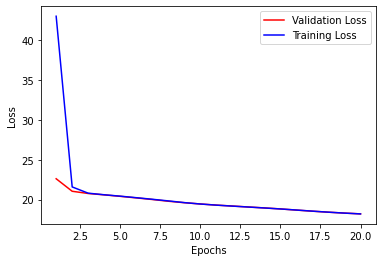

In [37]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [38]:
model1.save('Models\\DNN\\dnn_model_norm_2019_test_val_train_split_70_15_15.h5')

In [24]:
model1 = load_model('Models\\DNN\\dnn_model_norm_2019_test_val_train_split_70_15_15.h5',
                    custom_objects={'root_mean_squared_error': root_mean_squared_error,
                                    '_mean_absolute_error': _mean_absolute_error})

In [40]:
model1.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

25552/25552 [==============================] - 34s 1ms/step - loss: 18.1596 - _mean_absolute_error: 8.2733 - mse: 331.2438


[18.159637451171875, 8.27326774597168, 331.2437744140625]

In [41]:
model1.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

5609/5609 [==============================] - 7s 1ms/step - loss: 18.2185 - _mean_absolute_error: 8.2918 - mse: 333.4245


[18.218549728393555, 8.291787147521973, 333.42449951171875]

In [28]:
model1.evaluate(X_test, y_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

5499/5499 [==============================] - 7s 1ms/step - loss: 18.1827 - _mean_absolute_error: 8.2733 - mse: 332.0862


[18.1827392578125, 8.27332592010498, 332.086181640625]

In [42]:
y_pred = model1.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

5499/5499 [==============================] - 6s 1ms/step


In [43]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [44]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [45]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [46]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat        lon  \
0        NaN        NaN    NaN  NaN  NaN NaN NaN  84.65642 -179.95332   
1        NaN        NaN    NaN  NaN  NaN NaN NaN  83.95421 -179.95332   
2        NaN        NaN    NaN  NaN  NaN NaN NaN  83.32521 -179.95332   
3        NaN        NaN    NaN  NaN  NaN NaN NaN  82.75034 -179.95332   
4        NaN        NaN    NaN  NaN  NaN NaN NaN  82.21760 -179.95332   

   bulk_density  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [47]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [48]:
X_sample_scaled.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat  lon  bulk_density
0        NaN        NaN    NaN  NaN  NaN NaN NaN  1.025018  0.0           NaN
1        NaN        NaN    NaN  NaN  NaN NaN NaN  1.019864  0.0           NaN
2        NaN        NaN    NaN  NaN  NaN NaN NaN  1.015246  0.0           NaN
3        NaN        NaN    NaN  NaN  NaN NaN NaN  1.011026  0.0           NaN
4        NaN        NaN    NaN  NaN  NaN NaN NaN  1.007116  0.0           NaN

In [49]:
y_sample_pred = model1.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 15s 1ms/step


### Results and Plots

#### Snow Density

In [50]:
mae = mean_absolute_error(y_test['snow_density'], y_pred[:,0])
mae

16.293440326571233

In [51]:
mse = mean_squared_error(y_test['snow_density'], y_pred[:,0])
mse

664.0379499865301

In [52]:
rmse = mse**(1/2.0)
rmse

25.768933815478864

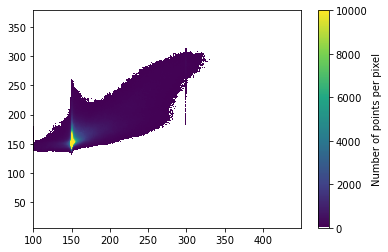

In [62]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['snow_density'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [54]:
X_sample["snow_density"] = y_sample_pred[:,0]

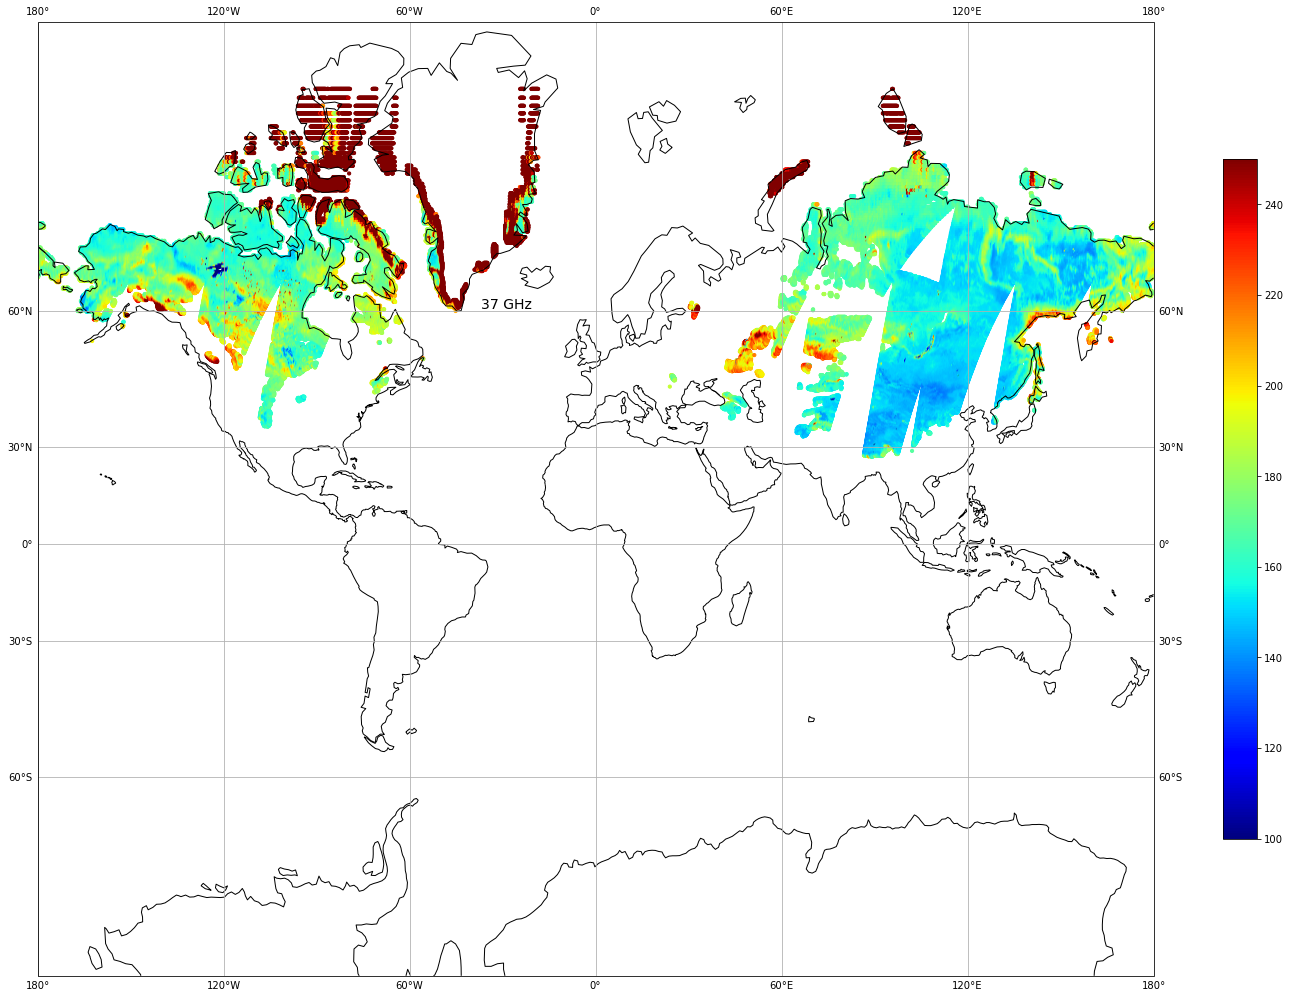

In [55]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=y_sample_pred[:,0], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

#### VOD

In [56]:
mae = mean_absolute_error(y_test['vod'], y_pred[:,1])
mae

0.25318299248218984

In [57]:
mse = mean_squared_error(y_test['vod'], y_pred[:,1])
mse

0.13368509424704075

In [58]:
rmse = mse**(1/2.0)
rmse

0.3656297228714328

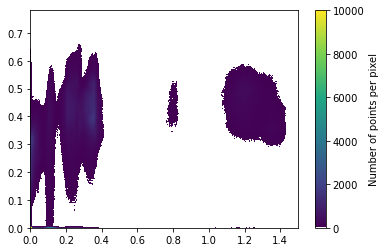

In [59]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['vod'], y_pred[:,1], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [60]:
X_sample["vod"] = y_sample_pred[:,1]

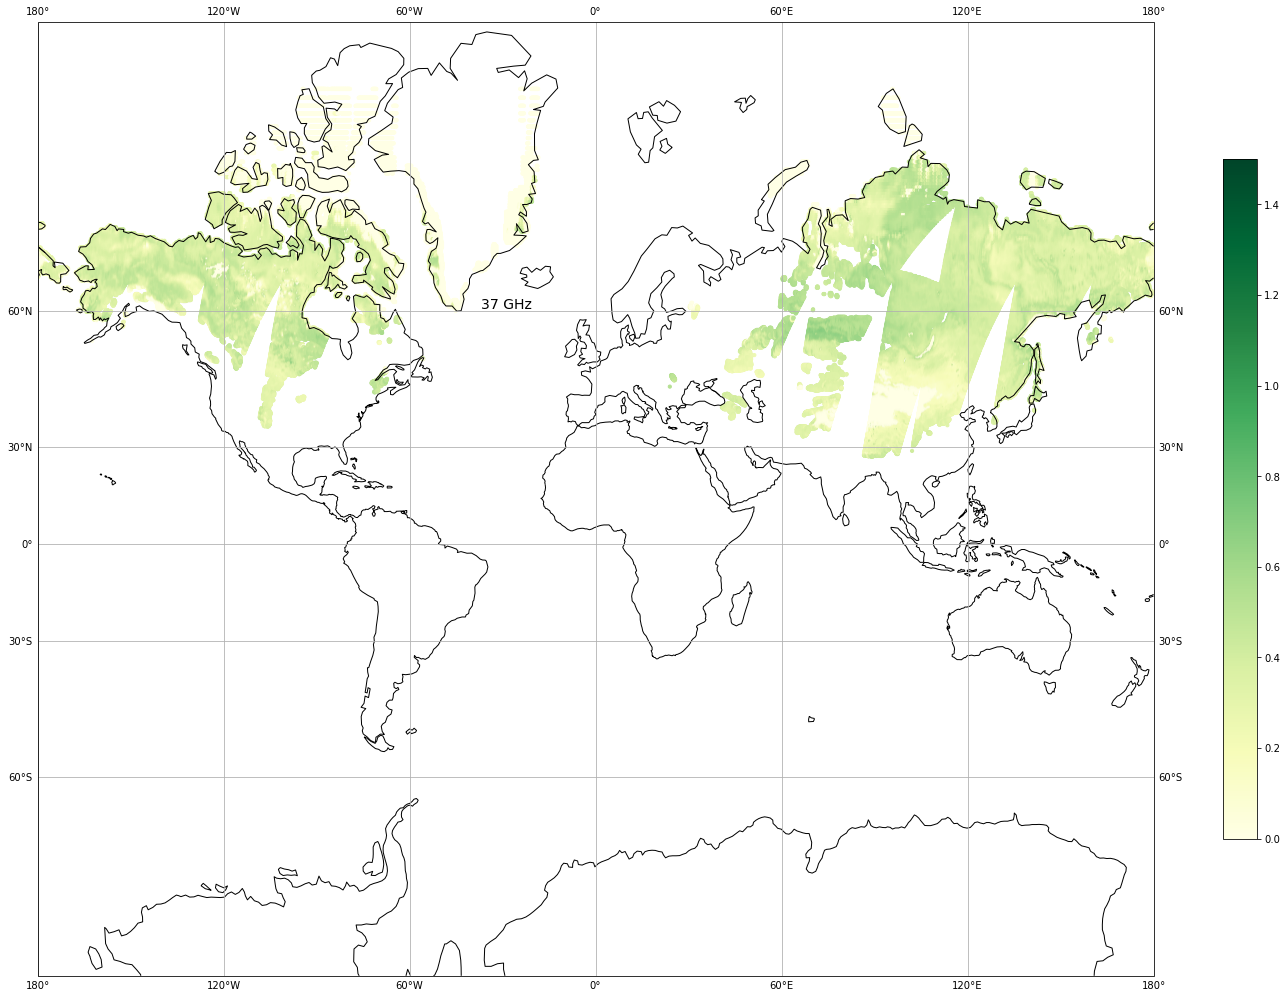

In [61]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["vod"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

### Model 2: Train/test on only 2019 (Standardized)

In [95]:
model2 = dnn_model()

In [96]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
               loss=root_mean_squared_error, metrics=[_mean_absolute_error, 'mse'])

In [97]:
callbacks_list = [
    EarlyStopping(
        monitor="val_loss",
        patience=3
    ),
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )    
]

In [43]:
batch_size = 500

In [99]:
history_retrieval = model2.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/20
25552/25552 [==============================] - 91s 3ms/step - loss: 40.8834 - _mean_absolute_error: 23.9359 - mse: 2895.4021 - val_loss: 19.7137 - val__mean_absolute_error: 9.4089 - val_mse: 390.0583
Epoch 2/20
25552/25552 [==============================] - 78s 3ms/step - loss: 18.9197 - _mean_absolute_error: 8.9053 - mse: 359.4178 - val_loss: 18.5598 - val__mean_absolute_error: 8.6452 - val_mse: 345.8777
Epoch 3/20
25552/25552 [==============================] - 80s 3ms/step - loss: 18.2802 - _mean_absolute_error: 8.5025 - mse: 335.5167 - val_loss: 18.1570 - val__mean_absolute_error: 8.4390 - val_mse: 331.0551
Epoch 4/20
25552/25552 [==============================] - 79s 3ms/step - loss: 17.9551 - _mean_absolute_error: 8.3159 - mse: 323.7367 - val_loss: 17.8822 - val__mean_absolute_error: 8.2659 - val_mse: 321.1542
Epoch 5/20
25552/25552 [==============================] - 77s 3ms/step - loss: 17.7184 - _mean_absolute_error: 8.1824 - mse: 315.2892 - val_loss: 17.6753 - val__m

In [100]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 60)                660       
                                                                 
 activation_14 (Activation)  (None, 60)                0         
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_15 (Dense)            (None, 60)                3660      
                                                                 
 activation_15 (Activation)  (None, 60)                0         
                                                                 
 dropout_13 (Dropout)        (None, 60)                0         
                                                                 
 dense_16 (Dense)            (None, 60)               

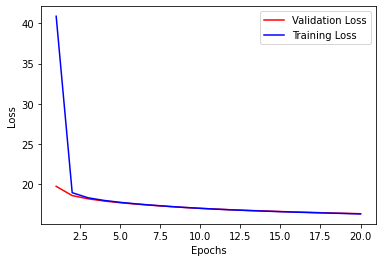

In [101]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [102]:
model2.save('Models\\DNN\\dnn_model_std_2019_test_val_train_split_70_15_15.h5')

In [44]:
model2 = load_model('Models\\DNN\\dnn_model_std_2019_test_val_train_split_70_15_15.h5',
                    custom_objects={'root_mean_squared_error': root_mean_squared_error,
                                    '_mean_absolute_error': _mean_absolute_error})

In [103]:
model2.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

25552/25552 [==============================] - 37s 1ms/step - loss: 16.2511 - _mean_absolute_error: 7.3292 - mse: 265.4204


[16.251096725463867, 7.329182147979736, 265.4204406738281]

In [104]:
model2.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

5609/5609 [==============================] - 8s 1ms/step - loss: 16.3022 - _mean_absolute_error: 7.3449 - mse: 267.1094


[16.302194595336914, 7.344919204711914, 267.10943603515625]

In [45]:
model2.evaluate(X_test, y_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

5499/5499 [==============================] - 7s 1ms/step - loss: 16.2820 - _mean_absolute_error: 7.3359 - mse: 266.4266


[16.281951904296875, 7.335936069488525, 266.4266357421875]

In [105]:
y_pred = model2.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

5499/5499 [==============================] - 7s 1ms/step


In [106]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [107]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [108]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [109]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat        lon  \
0        NaN        NaN    NaN  NaN  NaN NaN NaN  84.65642 -179.95332   
1        NaN        NaN    NaN  NaN  NaN NaN NaN  83.95421 -179.95332   
2        NaN        NaN    NaN  NaN  NaN NaN NaN  83.32521 -179.95332   
3        NaN        NaN    NaN  NaN  NaN NaN NaN  82.75034 -179.95332   
4        NaN        NaN    NaN  NaN  NaN NaN NaN  82.21760 -179.95332   

   bulk_density  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [110]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [111]:
y_sample_pred = model2.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 16s 1ms/step


### Results and Plots

#### Snow Density

In [112]:
mae = mean_absolute_error(y_test['snow_density'], y_pred[:,0])
mae

14.429563423553557

In [113]:
mse = mean_squared_error(y_test['snow_density'], y_pred[:,0])
mse

532.7417784550565

In [114]:
rmse = mse**(1/2.0)
rmse

23.081199675386383

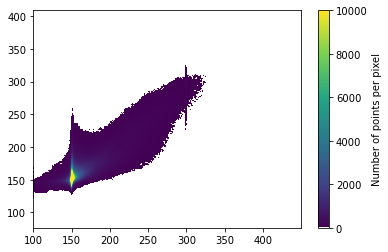

In [115]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['snow_density'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [116]:
X_sample["snow_density"] = y_sample_pred[:,0]

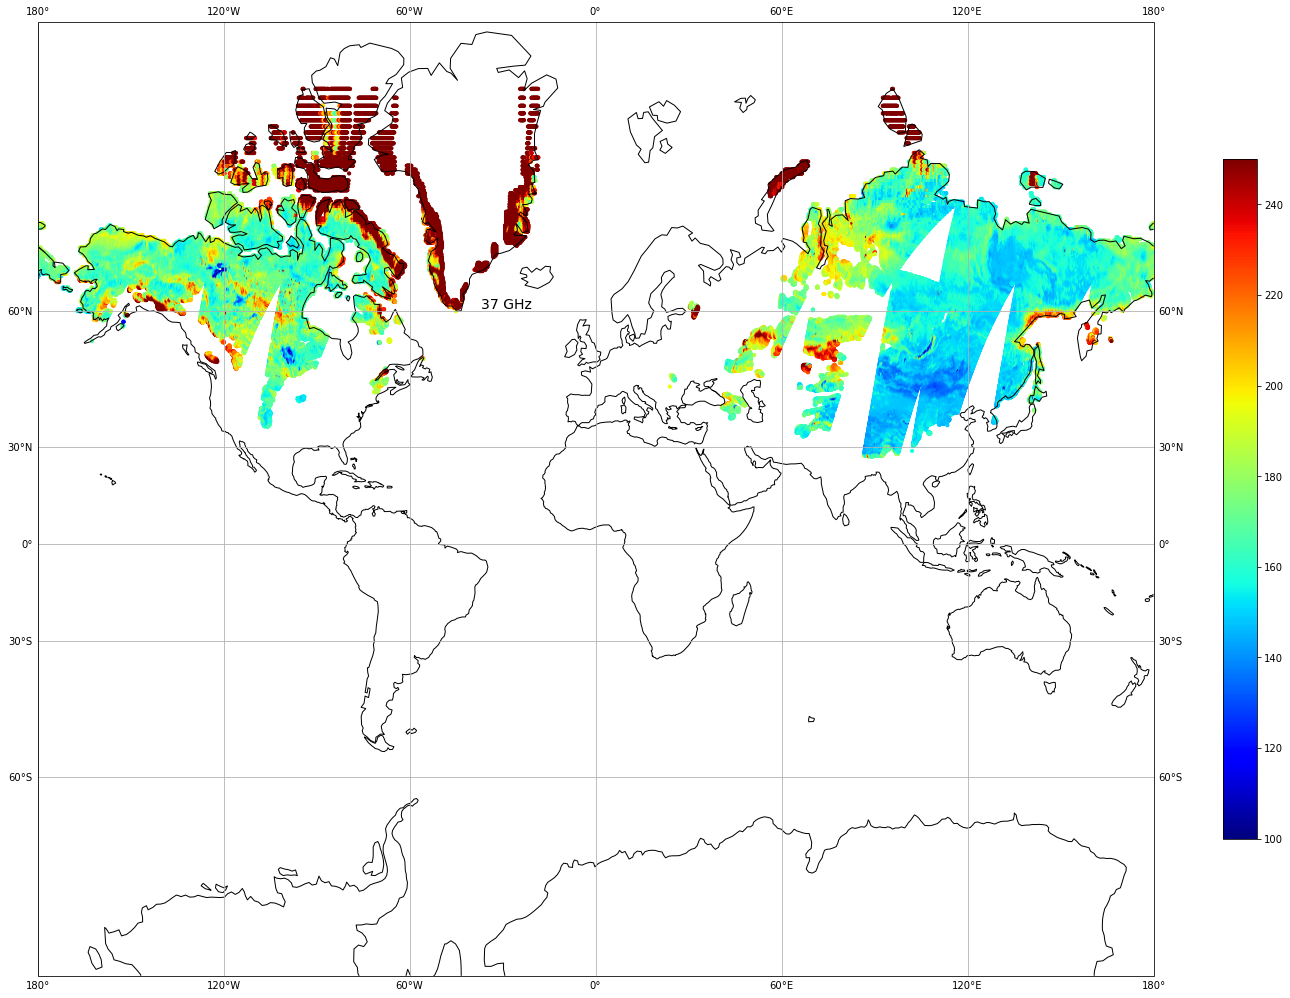

In [117]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["snow_density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

#### VOD

In [118]:
mae = mean_absolute_error(y_test['vod'], y_pred[:,1])
mae

0.24231369663167535

In [119]:
mse = mean_squared_error(y_test['vod'], y_pred[:,1])
mse

0.11148531960980368

In [120]:
rmse = mse**(1/2.0)
rmse

0.333894174267542

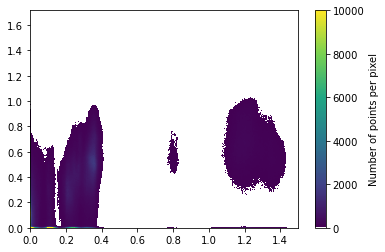

In [121]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['vod'], y_pred[:,1], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [122]:
X_sample["vod"] = y_sample_pred[:,1]

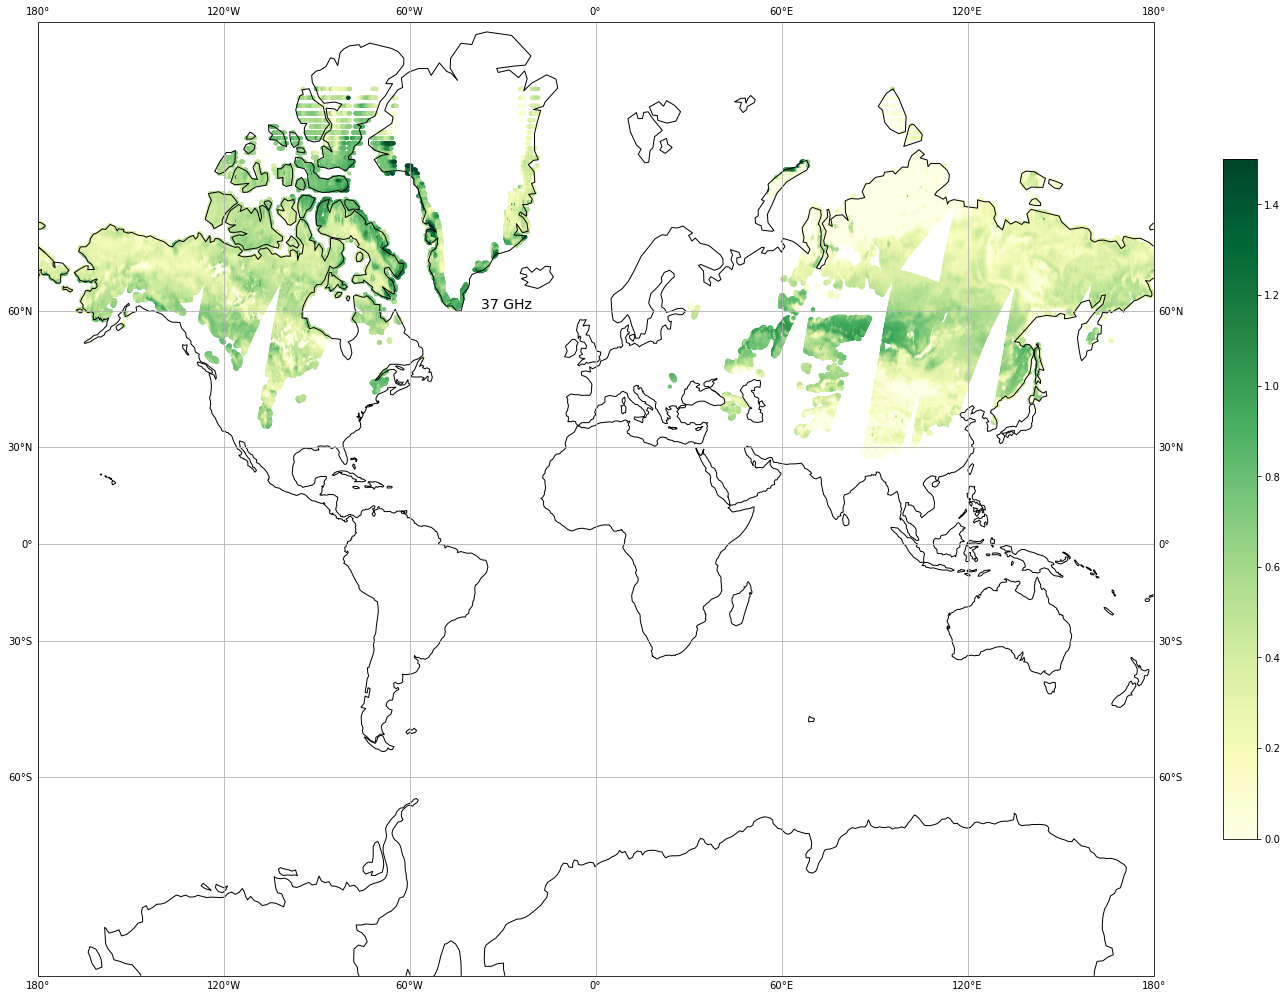

In [123]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["vod"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

### Model 3: Train on 2019, test on 2020 (Normalized)

In [37]:
model3 = dnn_model()

In [38]:
model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
               loss=root_mean_squared_error, metrics=[_mean_absolute_error, 'mse', root_mean_squared_error])

In [39]:
callbacks_list = [
    EarlyStopping(
        monitor="val_loss",
        patience=3
    ),
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )    
]

In [40]:
batch_size = 500

In [41]:
history_retrieval = model3.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/20
29328/29328 [==============================] - 78s 3ms/step - loss: 41.6830 - _mean_absolute_error: 25.0494 - mse: 2990.3059 - root_mean_squared_error: 41.6826 - val_loss: 22.0136 - val__mean_absolute_error: 11.2679 - val_mse: 485.9718 - val_root_mean_squared_error: 22.0135
Epoch 2/20
29328/29328 [==============================] - 77s 3ms/step - loss: 21.1014 - _mean_absolute_error: 10.2013 - mse: 446.8491 - root_mean_squared_error: 21.1015 - val_loss: 20.7250 - val__mean_absolute_error: 9.7475 - val_mse: 431.1074 - val_root_mean_squared_error: 20.7250
Epoch 3/20
29328/29328 [==============================] - 76s 3ms/step - loss: 20.5893 - _mean_absolute_error: 9.6441 - mse: 425.4405 - root_mean_squared_error: 20.5894 - val_loss: 20.4605 - val__mean_absolute_error: 9.5382 - val_mse: 420.2121 - val_root_mean_squared_error: 20.4606
Epoch 4/20
29328/29328 [==============================] - 76s 3ms/step - loss: 20.3165 - _mean_absolute_error: 9.4836 - mse: 414.2563 - root_mean_s

In [42]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                660       
                                                                 
 activation (Activation)     (None, 60)                0         
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 activation_1 (Activation)   (None, 60)                0         
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3

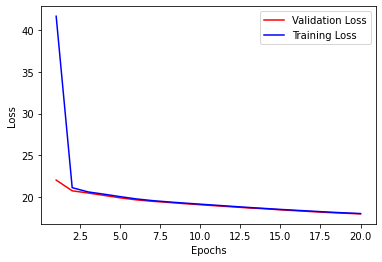

In [43]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [44]:
model3.save('Models\\DNN\\dnn_model_norm_2019_as_train.h5')

In [ ]:
model3 = load_model('Models\\DNN\\dnn_model_norm_2019_as_train.h5',
                    custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [45]:
model3.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

29328/29328 [==============================] - 41s 1ms/step - loss: 17.9473 - _mean_absolute_error: 8.1784 - mse: 323.5311 - root_mean_squared_error: 17.9472


[17.947294235229492, 8.178350448608398, 323.53106689453125, 17.94721221923828]

In [46]:
model3.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

7332/7332 [==============================] - 10s 1ms/step - loss: 17.9508 - _mean_absolute_error: 8.1756 - mse: 323.6538 - root_mean_squared_error: 17.9509


[17.950849533081055, 8.175570487976074, 323.65380859375, 17.950902938842773]

In [47]:
y_pred = model3.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

26743/26743 [==============================] - 31s 1ms/step


In [27]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [28]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [29]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [30]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat        lon  \
0        NaN        NaN    NaN  NaN  NaN NaN NaN  84.65642 -179.95332   
1        NaN        NaN    NaN  NaN  NaN NaN NaN  83.95421 -179.95332   
2        NaN        NaN    NaN  NaN  NaN NaN NaN  83.32521 -179.95332   
3        NaN        NaN    NaN  NaN  NaN NaN NaN  82.75034 -179.95332   
4        NaN        NaN    NaN  NaN  NaN NaN NaN  82.21760 -179.95332   

   bulk_density  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [31]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [32]:
X_sample_scaled.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat  lon  bulk_density
0        NaN        NaN    NaN  NaN  NaN NaN NaN  1.024974  0.0           NaN
1        NaN        NaN    NaN  NaN  NaN NaN NaN  1.019828  0.0           NaN
2        NaN        NaN    NaN  NaN  NaN NaN NaN  1.015219  0.0           NaN
3        NaN        NaN    NaN  NaN  NaN NaN NaN  1.011007  0.0           NaN
4        NaN        NaN    NaN  NaN  NaN NaN NaN  1.007103  0.0           NaN

In [48]:
y_sample_pred = model3.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 17s 1ms/step


### Results and Plots

#### Snow Density

In [49]:
mae = mean_absolute_error(y_test['snow_density'], y_pred[:,0])
mae

20.28380672164138

In [50]:
mse = mean_squared_error(y_test['snow_density'], y_pred[:,0])
mse

911.5215923029325

In [51]:
rmse = mse**(1/2.0)
rmse

30.191415871120263

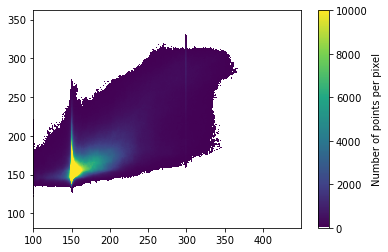

In [52]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['snow_density'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [53]:
X_sample["snow_density"] = y_sample_pred[:,0]

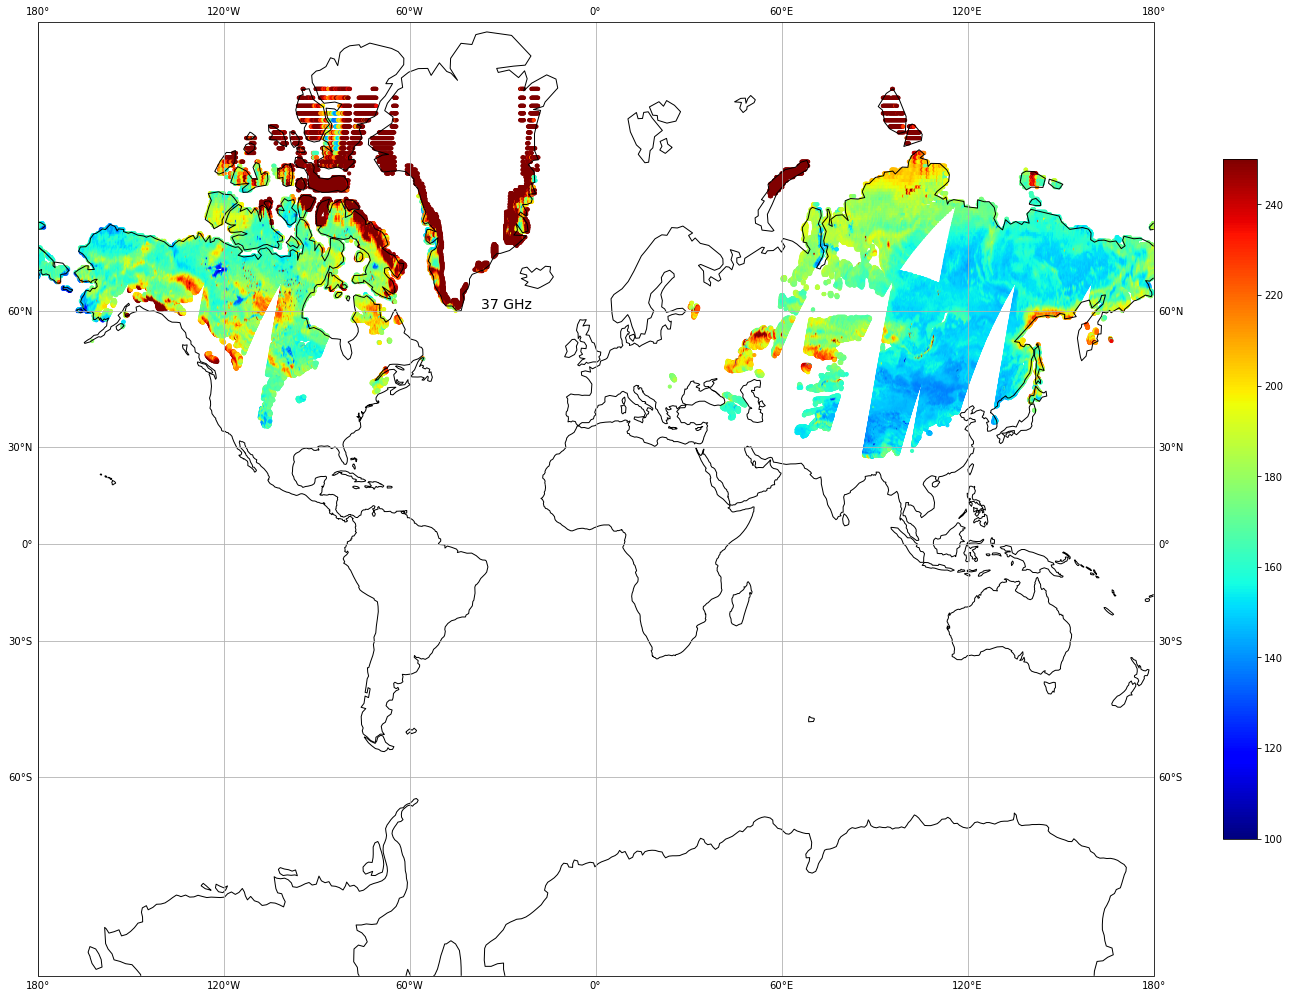

In [54]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["snow_density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

#### VOD

In [55]:
mae = mean_absolute_error(y_test['vod'], y_pred[:,1])
mae

0.23237576721135006

In [56]:
mse = mean_squared_error(y_test['vod'], y_pred[:,1])
mse

0.1076490169473641

In [57]:
rmse = mse**(1/2.0)
rmse

0.32809909623064204

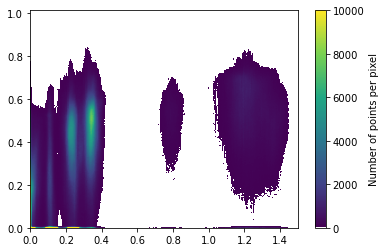

In [58]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['vod'], y_pred[:,1], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [59]:
X_sample["vod"] = y_sample_pred[:,1]

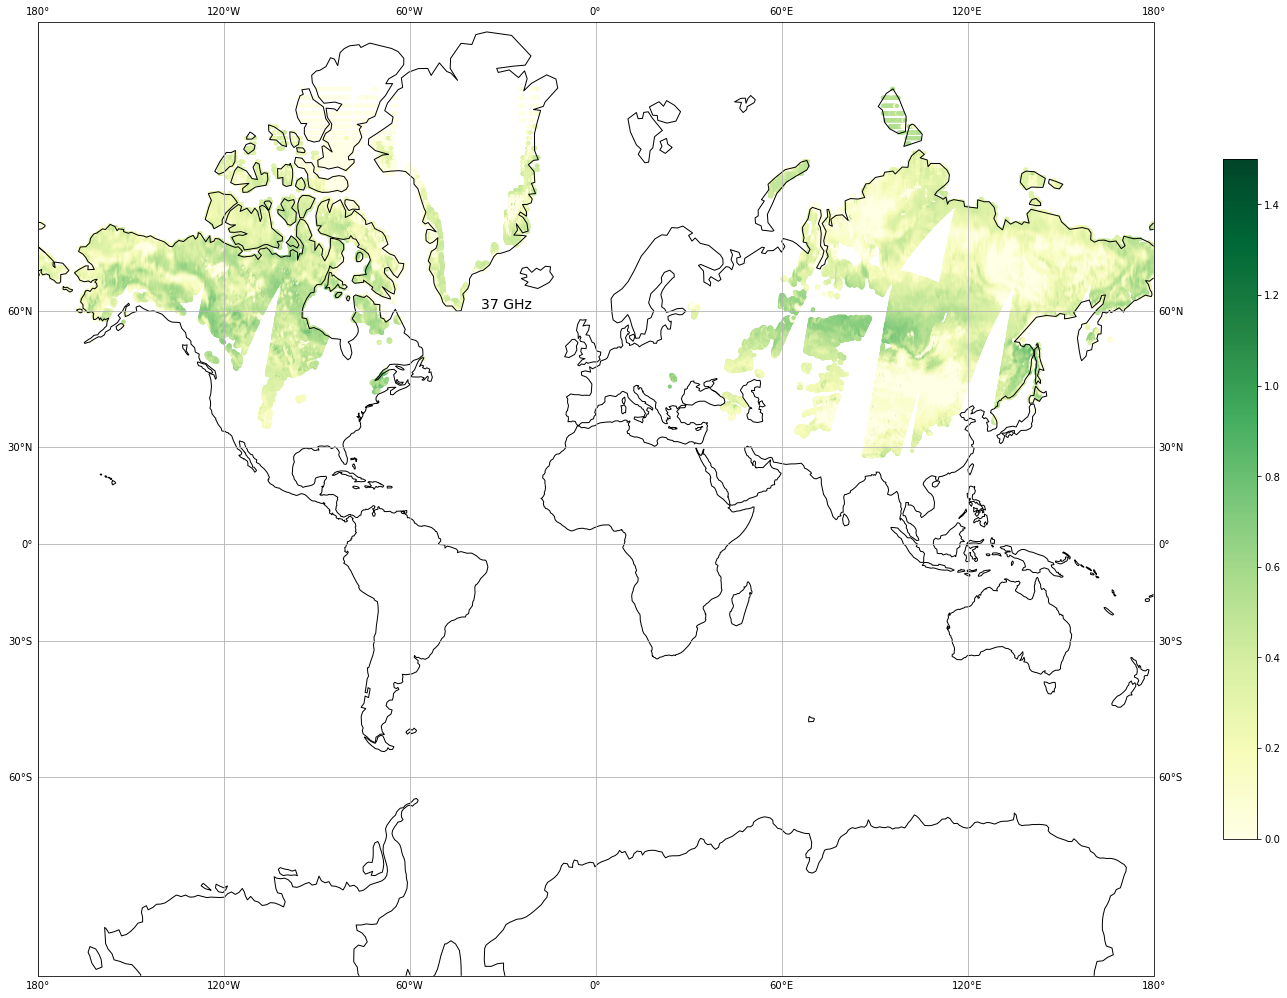

In [60]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["vod"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

### Model 4: Train on 2019, test on 2020 (Standardized)

In [128]:
model4 = dnn_model()

In [129]:
model4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
               loss=root_mean_squared_error, metrics=[_mean_absolute_error, 'mse', root_mean_squared_error])

In [130]:
callbacks_list = [
    EarlyStopping(
        monitor="val_loss",
        patience=3
    ),
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )    
]

In [131]:
batch_size = 500

In [132]:
history_retrieval = model4.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/20
29328/29328 [==============================] - 129s 4ms/step - loss: 38.7344 - _mean_absolute_error: 22.5236 - mse: 2686.1267 - root_mean_squared_error: 38.7341 - val_loss: 19.3210 - val__mean_absolute_error: 9.0843 - val_mse: 374.7296 - val_root_mean_squared_error: 19.3210
Epoch 2/20
29328/29328 [==============================] - 118s 4ms/step - loss: 18.7200 - _mean_absolute_error: 8.7458 - mse: 351.8854 - root_mean_squared_error: 18.7200 - val_loss: 18.3719 - val__mean_absolute_error: 8.4889 - val_mse: 338.9324 - val_root_mean_squared_error: 18.3719
Epoch 3/20
29328/29328 [==============================] - 119s 4ms/step - loss: 18.1087 - _mean_absolute_error: 8.3794 - mse: 329.3117 - root_mean_squared_error: 18.1086 - val_loss: 17.9246 - val__mean_absolute_error: 8.2651 - val_mse: 322.6439 - val_root_mean_squared_error: 17.9247
Epoch 4/20
29328/29328 [==============================] - 118s 4ms/step - loss: 17.7621 - _mean_absolute_error: 8.1838 - mse: 316.8426 - root_mean

In [133]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 60)                660       
                                                                 
 activation_14 (Activation)  (None, 60)                0         
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_15 (Dense)            (None, 60)                3660      
                                                                 
 activation_15 (Activation)  (None, 60)                0         
                                                                 
 dropout_13 (Dropout)        (None, 60)                0         
                                                                 
 dense_16 (Dense)            (None, 60)               

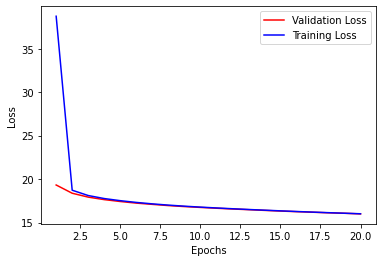

In [134]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [135]:
model4.save('Models\\DNN\\dnn_model_std_2019_as_train.h5')

In [136]:
model4.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

29328/29328 [==============================] - 52s 2ms/step - loss: 15.9760 - _mean_absolute_error: 7.1906 - mse: 256.4849 - root_mean_squared_error: 15.9761


[15.976044654846191, 7.19056510925293, 256.4848937988281, 15.976069450378418]

In [137]:
model4.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

7332/7332 [==============================] - 13s 2ms/step - loss: 15.9933 - _mean_absolute_error: 7.1962 - mse: 257.0301 - root_mean_squared_error: 15.9933


[15.993289947509766, 7.196153163909912, 257.0301208496094, 15.993303298950195]

In [138]:
y_pred = model4.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

26743/26743 [==============================] - 37s 1ms/step


In [139]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [140]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [141]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [142]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat        lon  \
0        NaN        NaN    NaN  NaN  NaN NaN NaN  84.65642 -179.95332   
1        NaN        NaN    NaN  NaN  NaN NaN NaN  83.95421 -179.95332   
2        NaN        NaN    NaN  NaN  NaN NaN NaN  83.32521 -179.95332   
3        NaN        NaN    NaN  NaN  NaN NaN NaN  82.75034 -179.95332   
4        NaN        NaN    NaN  NaN  NaN NaN NaN  82.21760 -179.95332   

   bulk_density  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [143]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [144]:
y_sample_pred = model4.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 19s 2ms/step


### Results and Plots

#### Snow Density

In [145]:
mae = mean_absolute_error(y_test['snow_density'], y_pred[:,0])
mae

19.235893484846844

In [146]:
mse = mean_squared_error(y_test['snow_density'], y_pred[:,0])
mse

837.860029339921

In [147]:
rmse = mse**(1/2.0)
rmse

28.945811948188997

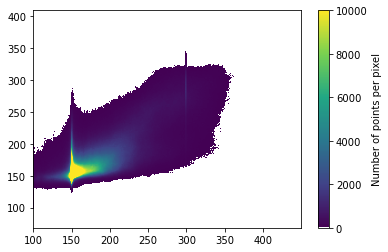

In [148]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['snow_density'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [149]:
X_sample["snow_density"] = y_sample_pred[:,0]

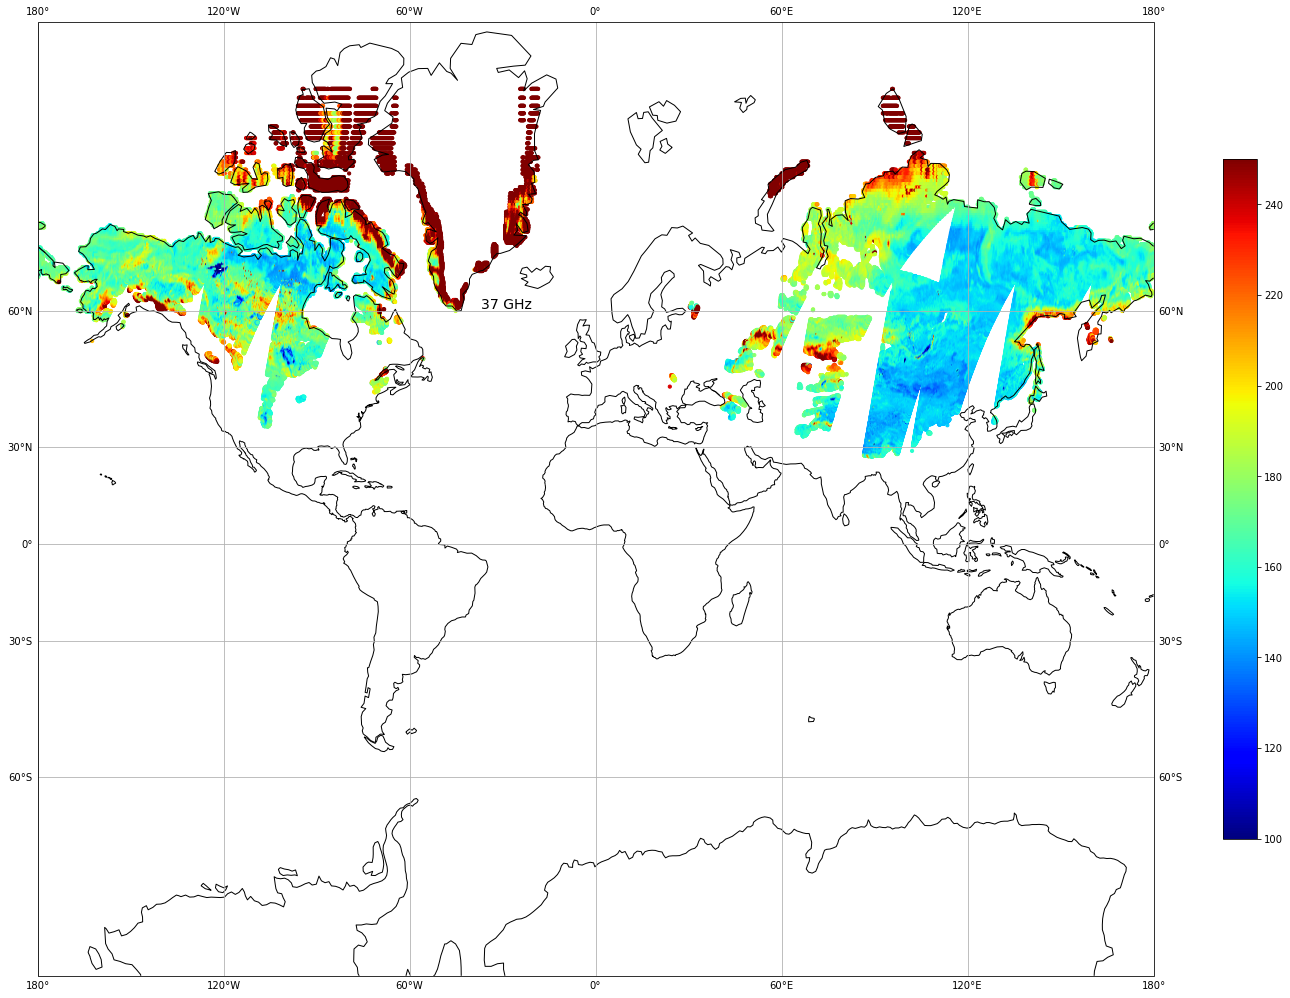

In [150]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["snow_density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

#### VOD

In [151]:
mae = mean_absolute_error(y_test['vod'], y_pred[:,1])
mae

0.21999621269654485

In [152]:
mse = mean_squared_error(y_test['vod'], y_pred[:,1])
mse

0.0976608805852049

In [153]:
rmse = mse**(1/2.0)
rmse

0.3125074088485022

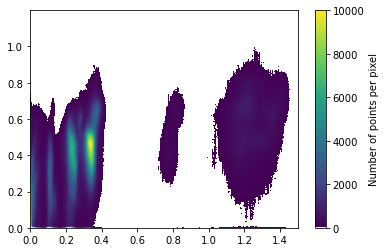

In [154]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['vod'], y_pred[:,1], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [155]:
X_sample["vod"] = y_sample_pred[:,1]

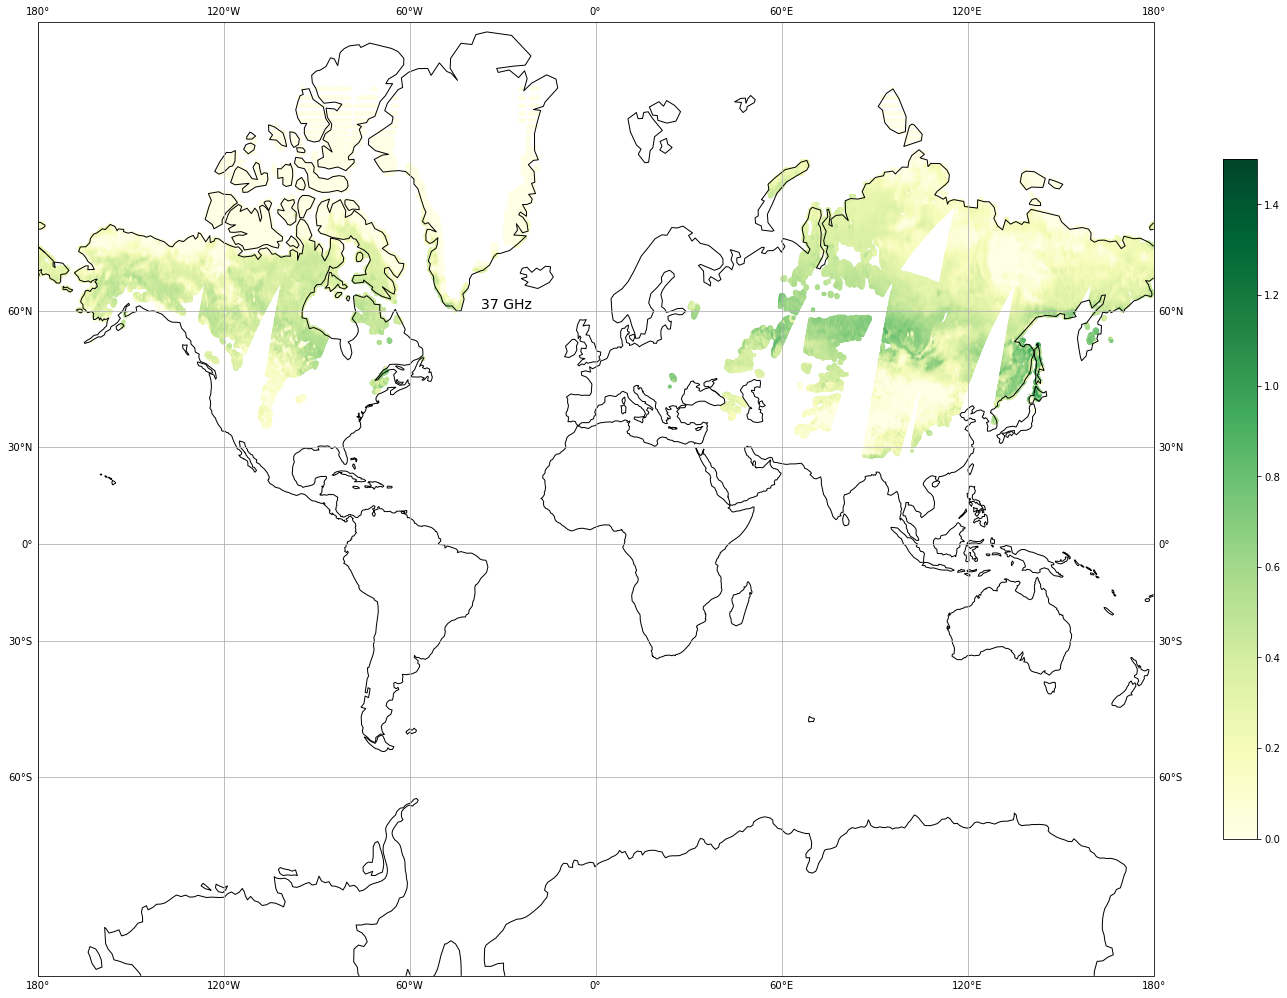

In [156]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["vod"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

### Model 5: Train on 2019, test on 2020 (Standardized) [exclude lat, lon]

#### Create datasets

In [52]:
df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'bulk_density']] = scaler.fit_transform(df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'bulk_density']])


In [53]:
df.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   1.113262   1.073475  0.569779  0.327774  0.103444 -0.025829   
1    161.904102   1.400972   1.050109  0.589497  0.446137  0.103376  0.042764   
2    163.183896   1.425694   1.053979  0.624992  0.600355  0.287561  0.169587   
3    164.070027   1.464427   1.060954  0.621048  0.588462  0.352520 -0.066834   
4    158.706063   1.221191   1.050333  0.620654  0.303260  0.012680 -0.055986   

          h  bulk_density        lat        lon        date       vod  
0  0.983535     -0.759116  62.684110 -160.44087  01_01_2019  0.360216  
1  0.960934     -0.672687  62.532246 -160.44087  01_01_2019  0.343348  
2  0.957021     -0.521954  62.381150 -160.44087  01_01_2019  0.363338  
3  0.955837     -0.618830  62.230810 -160.44087  01_01_2019  0.360973  
4  0.955955     -0.794435  62.684110 -160.34750  01_01_2019  0.359798

In [54]:
train = df[df["date"].apply(lambda x: x.split('_')[2] == '2019')]

In [55]:
train.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   1.113262   1.073475  0.569779  0.327774  0.103444 -0.025829   
1    161.904102   1.400972   1.050109  0.589497  0.446137  0.103376  0.042764   
2    163.183896   1.425694   1.053979  0.624992  0.600355  0.287561  0.169587   
3    164.070027   1.464427   1.060954  0.621048  0.588462  0.352520 -0.066834   
4    158.706063   1.221191   1.050333  0.620654  0.303260  0.012680 -0.055986   

          h  bulk_density        lat        lon        date       vod  
0  0.983535     -0.759116  62.684110 -160.44087  01_01_2019  0.360216  
1  0.960934     -0.672687  62.532246 -160.44087  01_01_2019  0.343348  
2  0.957021     -0.521954  62.381150 -160.44087  01_01_2019  0.363338  
3  0.955837     -0.618830  62.230810 -160.44087  01_01_2019  0.360973  
4  0.955955     -0.794435  62.684110 -160.34750  01_01_2019  0.359798

In [56]:
X = train[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'bulk_density']]
y = train[['snow_density', 'vod']]

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)

In [58]:
test = df[df["date"].apply(lambda x: x.split('_')[2] == '2020')]

In [59]:
test.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv  \
18329587    179.471841  -0.750608   0.895647  0.313434  0.321851  0.300468   
18329588    176.776952  -0.730265   0.823541  0.413870  0.099469 -0.061708   
18329589    181.312867  -0.816404   0.325752  0.407721  0.305540  0.418985   
18329590    183.489251  -0.852478   0.589527  0.369116  0.403837  0.534498   
18329591    182.247955  -0.985826  -0.194500  0.408846 -0.033579 -0.060477   

                cf         h  bulk_density        lat        lon        date  \
18329587 -0.031529  0.740869     -1.750119  62.230810 -162.77490  01_01_2020   
18329588  0.311154  0.560089     -1.455303  62.081207 -162.77490  01_01_2020   
18329589 -0.101600  0.585237     -1.283617  62.230810 -162.49481  01_01_2020   
18329590 -0.379240  0.724243     -1.474913  62.381150 -162.40146  01_01_2020   
18329591  0.652284  0.391080     -0.874631  61.932335 -162.21474  01_01_2020   

               vod  
18329587  0.136579  
18329588  0.371299  
18329589  1.187509  
18329590  0.367274  
18329591  0.243427

In [60]:
X_test = test[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'bulk_density']]
y_test = test[['snow_density', 'vod']]

In [61]:
X_train.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
17720940   0.330500   0.632350  0.237224  0.647049  0.380193 -0.266800   
11233780   1.103134   0.665665  0.326896  0.614950  0.698504 -1.032745   
2485422    0.591111  -0.081201  0.191179 -1.388321 -2.198558 -0.001594   
1154291   -1.289277  -0.442425  0.191179  0.347350  0.040254  0.383095   
6723943   -0.528640   0.332758  0.239707 -0.372435 -0.931445  1.053642   

                 h  bulk_density  
17720940 -0.905744      0.382322  
11233780  0.802971     -0.623270  
2485422   5.480118      0.864597  
1154291   0.090344     -0.788323  
6723943  -1.091048      0.598602

In [62]:
X_val.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
8175713   -0.234347   0.297651  0.191179  0.550204  0.385314  0.094455   
18055958   0.140103   0.466912  0.231279 -0.136863 -0.409455  0.606229   
4853484   -0.613712   0.970789  0.569781  0.486891  0.467300  1.688043   
16883108  -1.643684   0.627646  0.199066  1.012745  0.549564  0.152898   
44884     -0.193442  -0.432662 -3.149223 -1.350504 -0.224658 -2.521373   

                 h  bulk_density  
8175713   0.589786     -0.471973  
18055958 -1.398572      0.241156  
4853484  -0.779639      0.180577  
16883108  0.649941     -0.361798  
44884    -0.948237      2.147285

In [63]:
X_test.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
18329587  -0.750608   0.895647  0.313434  0.321851  0.300468 -0.031529   
18329588  -0.730265   0.823541  0.413870  0.099469 -0.061708  0.311154   
18329589  -0.816404   0.325752  0.407721  0.305540  0.418985 -0.101600   
18329590  -0.852478   0.589527  0.369116  0.403837  0.534498 -0.379240   
18329591  -0.985826  -0.194500  0.408846 -0.033579 -0.060477  0.652284   

                 h  bulk_density  
18329587  0.740869     -1.750119  
18329588  0.560089     -1.455303  
18329589  0.585237     -1.283617  
18329590  0.724243     -1.474913  
18329591  0.391080     -0.874631

#### Train Model

In [64]:
model5 = dnn_model()

In [65]:
model5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
               loss=root_mean_squared_error, metrics=[_mean_absolute_error, 'mse', root_mean_squared_error])

In [66]:
callbacks_list = [
    EarlyStopping(
        monitor="val_loss",
        patience=3
    ),
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )    
]

In [67]:
batch_size = 500

In [68]:
history_retrieval = model5.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/20
29328/29328 [==============================] - 75s 3ms/step - loss: 39.6070 - _mean_absolute_error: 22.7410 - mse: 2655.8765 - root_mean_squared_error: 39.6064 - val_loss: 19.8747 - val__mean_absolute_error: 9.4771 - val_mse: 396.4064 - val_root_mean_squared_error: 19.8748
Epoch 2/20
29328/29328 [==============================] - 75s 3ms/step - loss: 19.5110 - _mean_absolute_error: 9.2521 - mse: 382.0751 - root_mean_squared_error: 19.5110 - val_loss: 19.2913 - val__mean_absolute_error: 9.1474 - val_mse: 373.5391 - val_root_mean_squared_error: 19.2913
Epoch 3/20
29328/29328 [==============================] - 78s 3ms/step - loss: 19.1383 - _mean_absolute_error: 9.0222 - mse: 367.6719 - root_mean_squared_error: 19.1383 - val_loss: 19.0333 - val__mean_absolute_error: 8.9049 - val_mse: 363.6867 - val_root_mean_squared_error: 19.0333
Epoch 4/20
29328/29328 [==============================] - 76s 3ms/step - loss: 18.9290 - _mean_absolute_error: 8.8955 - mse: 359.6864 - root_mean_squ

In [69]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                540       
                                                                 
 activation (Activation)     (None, 60)                0         
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 activation_1 (Activation)   (None, 60)                0         
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3

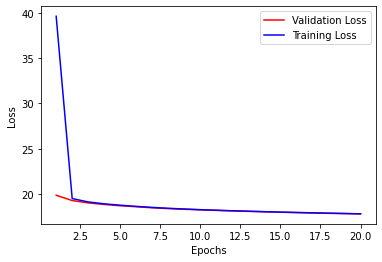

In [70]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [71]:
model5.save('Models\\DNN\\dnn_model_std_without_lat_lon_2019_as_train.h5')

In [72]:
model5.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

29328/29328 [==============================] - 38s 1ms/step - loss: 17.8068 - _mean_absolute_error: 8.2756 - mse: 318.4103 - root_mean_squared_error: 17.8067


[17.80682945251465, 8.275619506835938, 318.4103088378906, 17.80673599243164]

In [73]:
model5.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

7332/7332 [==============================] - 10s 1ms/step - loss: 17.8177 - _mean_absolute_error: 8.2740 - mse: 318.8097 - root_mean_squared_error: 17.8177


[17.81773567199707, 8.27396297454834, 318.8096923828125, 17.817747116088867]

In [74]:
y_pred = model5.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

26743/26743 [==============================] - 30s 1ms/step


In [75]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [89]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [90]:
temp = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [78]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'bulk_density']]

In [79]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density
0        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN
1        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN
2        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN
3        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN
4        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN

In [80]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [82]:
y_sample_pred = model5.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 16s 1ms/step


### Results and Plots

#### Snow Density

In [83]:
mae = mean_absolute_error(y_test['snow_density'], y_pred[:,0])
mae

20.48553033845665

In [84]:
mse = mean_squared_error(y_test['snow_density'], y_pred[:,0])
mse

909.0532465055478

In [85]:
rmse = mse**(1/2.0)
rmse

30.150509887986104

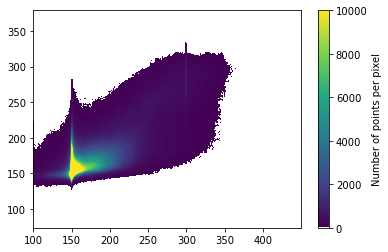

In [86]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['snow_density'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [91]:
temp["snow_density"] = y_sample_pred[:,0]

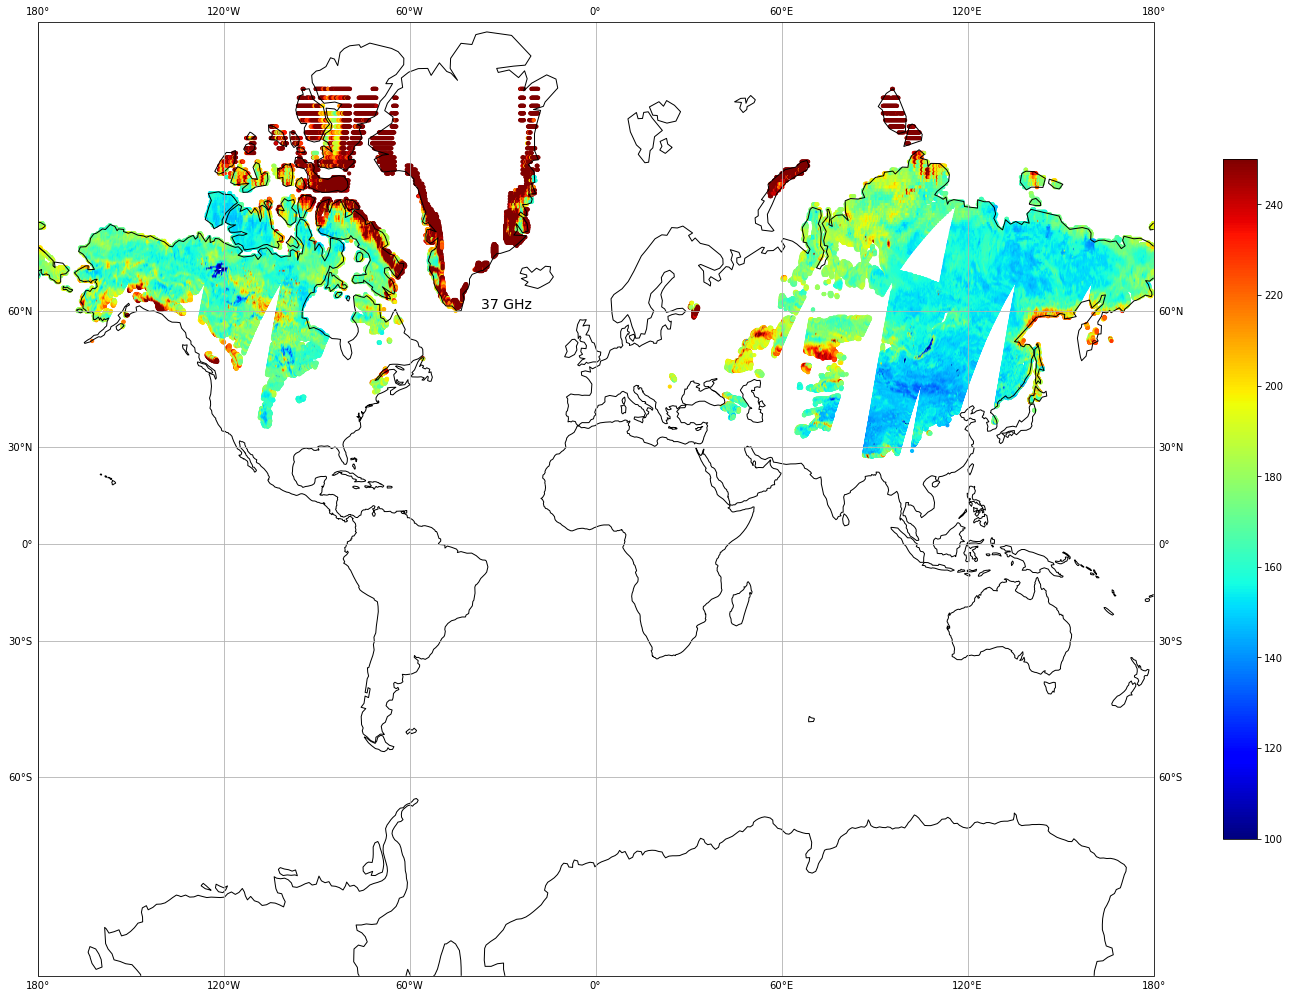

In [92]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(temp["lon"], temp["lat"], c=temp["snow_density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

#### VOD

In [93]:
mae = mean_absolute_error(y_test['vod'], y_pred[:,1])
mae

0.34422863524261893

In [94]:
mse = mean_squared_error(y_test['vod'], y_pred[:,1])
mse

0.26157848906664366

In [95]:
rmse = mse**(1/2.0)
rmse

0.5114474450680575

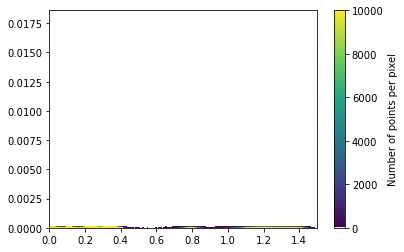

In [96]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['vod'], y_pred[:,1], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [97]:
temp["vod"] = y_sample_pred[:,1]

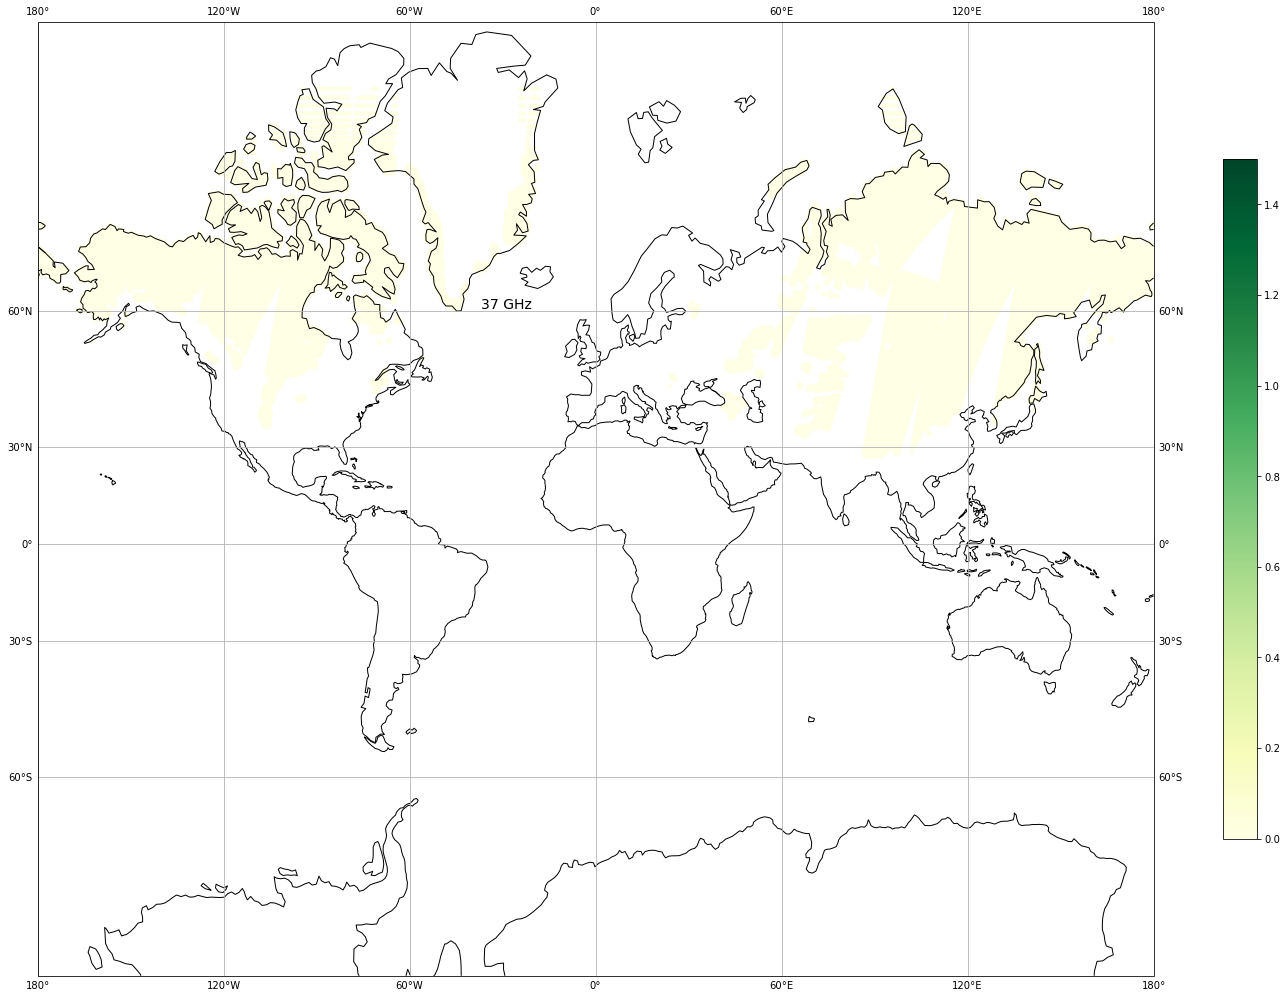

In [98]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(temp["lon"], temp["lat"], c=temp["vod"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

### Model 6: Train on 2019, test on 2020 (Standardized) [exclude lat, lon] {Augment VOD}

### Analyse VOD

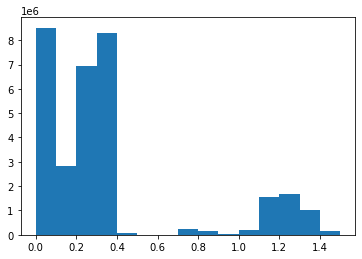

In [10]:
plt.hist(df['vod'], bins=15)
plt.show()

#### Take whole of 2019 as train and whole 2020 as test

In [178]:
scaler = StandardScaler() 

In [179]:
df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']] = scaler.fit_transform(df[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']])

In [257]:
df.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   1.113262   1.073475  0.569779  0.327774  0.103444 -0.025829   
1    161.904102   1.400972   1.050109  0.589497  0.446137  0.103376  0.042764   
2    163.183896   1.425694   1.053979  0.624992  0.600355  0.287561  0.169587   
3    164.070027   1.464427   1.060954  0.621048  0.588462  0.352520 -0.066834   
4    158.706063   1.221191   1.050333  0.620654  0.303260  0.012680 -0.055986   

          h  bulk_density       lat       lon        date       vod  
0  0.983535     -0.759116  0.789650 -1.796875  01_01_2019  0.360216  
1  0.960934     -0.672687  0.775604 -1.796875  01_01_2019  0.343348  
2  0.957021     -0.521954  0.761629 -1.796875  01_01_2019  0.363338  
3  0.955837     -0.618830  0.747724 -1.796875  01_01_2019  0.360973  
4  0.955955     -0.794435  0.789650 -1.796006  01_01_2019  0.359798

In [181]:
train = df[df["date"].apply(lambda x: x.split('_')[2] == '2019')]

In [182]:
train.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
0    158.320411   1.113262   1.073475  0.569779  0.327774  0.103444 -0.025829   
1    161.904102   1.400972   1.050109  0.589497  0.446137  0.103376  0.042764   
2    163.183896   1.425694   1.053979  0.624992  0.600355  0.287561  0.169587   
3    164.070027   1.464427   1.060954  0.621048  0.588462  0.352520 -0.066834   
4    158.706063   1.221191   1.050333  0.620654  0.303260  0.012680 -0.055986   

          h  bulk_density       lat       lon        date       vod  
0  0.983535     -0.759116  0.789650 -1.796875  01_01_2019  0.360216  
1  0.960934     -0.672687  0.775604 -1.796875  01_01_2019  0.343348  
2  0.957021     -0.521954  0.761629 -1.796875  01_01_2019  0.363338  
3  0.955837     -0.618830  0.747724 -1.796875  01_01_2019  0.360973  
4  0.955955     -0.794435  0.789650 -1.796006  01_01_2019  0.359798

In [183]:
X = train[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
# y = train[['snow_density', 'vod']]
y = train[['snow_density']]
# y = train[['vod']]

In [136]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)

In [95]:
test = df[df["date"].apply(lambda x: x.split('_')[2] == '2020')]

In [260]:
test.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv  \
18329587    179.471841  -0.750608   0.895647  0.313434  0.321851  0.300468   
18329588    176.776952  -0.730265   0.823541  0.413870  0.099469 -0.061708   
18329589    181.312867  -0.816404   0.325752  0.407721  0.305540  0.418985   
18329590    183.489251  -0.852478   0.589527  0.369116  0.403837  0.534498   
18329591    182.247955  -0.985826  -0.194500  0.408846 -0.033579 -0.060477   

                cf         h  bulk_density       lat       lon        date  \
18329587 -0.031529  0.740869     -1.750119  0.747724 -1.818588  01_01_2020   
18329588  0.311154  0.560089     -1.455303  0.733888 -1.818588  01_01_2020   
18329589 -0.101600  0.585237     -1.283617  0.747724 -1.815982  01_01_2020   
18329590 -0.379240  0.724243     -1.474913  0.761629 -1.815114  01_01_2020   
18329591  0.652284  0.391080     -0.874631  0.720118 -1.813377  01_01_2020   

               vod  
18329587  0.136579  
18329588  0.371299  
18329589  1.187509  
18329590  0.367274  
18329591  0.243427

In [184]:
X_test = test[['snow_temp','soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]
# y_test = test[['snow_density', 'vod']]
y_test = test[['snow_density']]
# y_test = test[['vod']]

In [185]:
X_train.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
17720940   0.330500   0.632350  0.237224  0.647049  0.380193 -0.266800   
11233780   1.103134   0.665665  0.326896  0.614950  0.698504 -1.032745   
2485422    0.591111  -0.081201  0.191179 -1.388321 -2.198558 -0.001594   
1154291   -1.289277  -0.442425  0.191179  0.347350  0.040254  0.383095   
6723943   -0.528640   0.332758  0.239707 -0.372435 -0.931445  1.053642   

                 h       lat       lon  bulk_density  
17720940 -0.905744  0.533877 -1.403437      0.382322  
11233780  0.802971  0.572821 -1.570192     -0.623270  
2485422   5.480118 -0.510012 -1.167200      0.864597  
1154291   0.090344 -0.001255  0.933740     -0.788323  
6723943  -1.091048  0.168218 -1.257526      0.598602

In [186]:
X_val.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
8175713   -0.234347   0.297651  0.191179  0.550204  0.385314  0.094455   
18055958   0.140103   0.466912  0.231279 -0.136863 -0.409455  0.606229   
4853484   -0.613712   0.970789  0.569781  0.486891  0.467300  1.688043   
16883108  -1.643684   0.627646  0.199066  1.012745  0.549564  0.152898   
44884     -0.193442  -0.432662 -3.149223 -1.350504 -0.224658 -2.521373   

                 h       lat       lon  bulk_density  
8175713   0.589786  0.395085  0.947637     -0.471973  
18055958 -1.398572  0.395085 -1.326139      0.241156  
4853484  -0.779639 -0.350370 -1.098588      0.180577  
16883108  0.649941  0.226497  0.858179     -0.361798  
44884    -0.948237 -1.162954  0.533354      2.147285

In [259]:
X_test.head()

snow_temp  soil_temp     omega       Tbh       Tbv        cf  \
18329587  -0.750608   0.895647  0.313434  0.321851  0.300468 -0.031529   
18329588  -0.730265   0.823541  0.413870  0.099469 -0.061708  0.311154   
18329589  -0.816404   0.325752  0.407721  0.305540  0.418985 -0.101600   
18329590  -0.852478   0.589527  0.369116  0.403837  0.534498 -0.379240   
18329591  -0.985826  -0.194500  0.408846 -0.033579 -0.060477  0.652284   

                 h       lat       lon  bulk_density  
18329587  0.740869  0.747724 -1.818588     -1.750119  
18329588  0.560089  0.733888 -1.818588     -1.455303  
18329589  0.585237  0.747724 -1.815982     -1.283617  
18329590  0.724243  0.761629 -1.815114     -1.474913  
18329591  0.391080  0.720118 -1.813377     -0.874631

In [188]:
y_test.head()

snow_density
18329587    179.471841
18329588    176.776952
18329589    181.312867
18329590    183.489251
18329591    182.247955

#### Train Model

In [142]:
def dnn_model_2():

    # Parameters
    hidden_units = 60
    dropout = 0

    # LAND
    model = Sequential()

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(1))
    model.add(Activation('relu'))

    return model

In [143]:
model6 = dnn_model_2()

In [144]:
model6.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
               loss=root_mean_squared_error, metrics=[_mean_absolute_error, 'mse', root_mean_squared_error])

In [145]:
callbacks_list = [
    EarlyStopping(
        monitor="val_loss",
        patience=3
    ),
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
    )    
]

In [146]:
batch_size = 500

#### Snow Density

In [107]:
history_retrieval = model6.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/50
29328/29328 [==============================] - 177s 6ms/step - loss: 54.9382 - _mean_absolute_error: 44.2933 - mse: 5214.2236 - root_mean_squared_error: 54.9377 - val_loss: 27.8044 - val__mean_absolute_error: 18.3560 - val_mse: 775.9979 - val_root_mean_squared_error: 27.8044
Epoch 2/50
29328/29328 [==============================] - 166s 6ms/step - loss: 26.8901 - _mean_absolute_error: 17.5779 - mse: 726.0471 - root_mean_squared_error: 26.8899 - val_loss: 26.2771 - val__mean_absolute_error: 16.9790 - val_mse: 693.2993 - val_root_mean_squared_error: 26.2771
Epoch 3/50
29328/29328 [==============================] - 162s 6ms/step - loss: 25.8904 - _mean_absolute_error: 16.7051 - mse: 673.0981 - root_mean_squared_error: 25.8904 - val_loss: 25.5824 - val__mean_absolute_error: 16.4228 - val_mse: 657.2488 - val_root_mean_squared_error: 25.5823
Epoch 4/50
29328/29328 [==============================] - 165s 6ms/step - loss: 25.3181 - _mean_absolute_error: 16.2458 - mse: 643.7166 - roo

In [108]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 60)                660       
                                                                 
 activation_7 (Activation)   (None, 60)                0         
                                                                 
 dropout_6 (Dropout)         (None, 60)                0         
                                                                 
 dense_8 (Dense)             (None, 60)                3660      
                                                                 
 activation_8 (Activation)   (None, 60)                0         
                                                                 
 dropout_7 (Dropout)         (None, 60)                0         
                                                                 
 dense_9 (Dense)             (None, 60)               

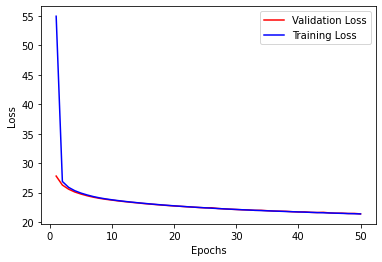

In [109]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 51)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [110]:
model6.save('Models\\DNN\\dnn_model_std_2019_as_train_sd_only.h5')

In [191]:
model6 = load_model('Models\\DNN\\dnn_model_std_2019_as_train_sd_only.h5',
                   custom_objects={'root_mean_squared_error': root_mean_squared_error,
                                    '_mean_absolute_error': _mean_absolute_error})

In [111]:
model6.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

29328/29328 [==============================] - 66s 2ms/step - loss: 21.3543 - _mean_absolute_error: 13.1138 - mse: 458.4017 - root_mean_squared_error: 21.3542


[21.354251861572266, 13.11375904083252, 458.4017333984375, 21.354196548461914]

In [112]:
model6.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

7332/7332 [==============================] - 16s 2ms/step - loss: 21.3842 - _mean_absolute_error: 13.1269 - mse: 459.6713 - root_mean_squared_error: 21.3842


[21.384199142456055, 13.1268949508667, 459.67132568359375, 21.384185791015625]

In [192]:
y_pred = model6.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

26743/26743 [==============================] - 69s 3ms/step


In [114]:
y_pred

array([[166.36626],
       [163.1138 ],
       [175.45497],
       ...,
       [201.12283],
       [199.2568 ],
       [201.77473]], dtype=float32)

In [256]:
y_pred

array([[166.36626],
       [163.1138 ],
       [175.45497],
       ...,
       [201.12283],
       [199.2568 ],
       [201.77473]], dtype=float32)

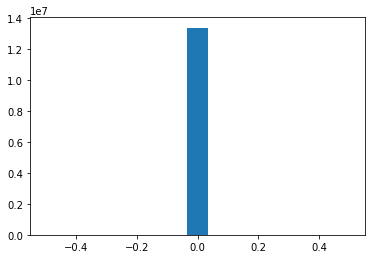

In [79]:
plt.hist(y_pred[:,1], bins=15)
plt.show()

In [194]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [195]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [196]:
temp = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [197]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [198]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat        lon  \
0        NaN        NaN    NaN  NaN  NaN NaN NaN  84.65642 -179.95332   
1        NaN        NaN    NaN  NaN  NaN NaN NaN  83.95421 -179.95332   
2        NaN        NaN    NaN  NaN  NaN NaN NaN  83.32521 -179.95332   
3        NaN        NaN    NaN  NaN  NaN NaN NaN  82.75034 -179.95332   
4        NaN        NaN    NaN  NaN  NaN NaN NaN  82.21760 -179.95332   

   bulk_density  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [199]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [200]:
y_sample_pred = model6.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 36s 3ms/step


In [201]:
y_sample_pred[:10,0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

#### VOD

In [147]:
history_retrieval = model6.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                               batch_size = batch_size, callbacks=callbacks_list, verbose=1)

Epoch 1/50
29328/29328 [==============================] - 230s 8ms/step - loss: 0.2439 - _mean_absolute_error: 0.1467 - mse: 0.0610 - root_mean_squared_error: 0.2439 - val_loss: 0.2243 - val__mean_absolute_error: 0.1296 - val_mse: 0.0505 - val_root_mean_squared_error: 0.2243
Epoch 2/50
29328/29328 [==============================] - 280s 10ms/step - loss: 0.2197 - _mean_absolute_error: 0.1249 - mse: 0.0484 - root_mean_squared_error: 0.2197 - val_loss: 0.2158 - val__mean_absolute_error: 0.1208 - val_mse: 0.0468 - val_root_mean_squared_error: 0.2158
Epoch 3/50
29328/29328 [==============================] - 275s 9ms/step - loss: 0.2136 - _mean_absolute_error: 0.1191 - mse: 0.0458 - root_mean_squared_error: 0.2136 - val_loss: 0.2114 - val__mean_absolute_error: 0.1171 - val_mse: 0.0449 - val_root_mean_squared_error: 0.2114
Epoch 4/50
29328/29328 [==============================] - 275s 9ms/step - loss: 0.2101 - _mean_absolute_error: 0.1156 - mse: 0.0443 - root_mean_squared_error: 0.2101 - val

In [148]:
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 60)                660       
                                                                 
 activation_14 (Activation)  (None, 60)                0         
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_15 (Dense)            (None, 60)                3660      
                                                                 
 activation_15 (Activation)  (None, 60)                0         
                                                                 
 dropout_13 (Dropout)        (None, 60)                0         
                                                                 
 dense_16 (Dense)            (None, 60)               

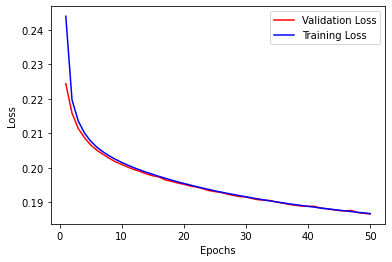

In [149]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 51)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [150]:
model6.save('Models\\DNN\\dnn_model_std_2019_as_train_vod_only.h5')

In [151]:
model6.evaluate(X_train, y_train, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

29328/29328 [==============================] - 91s 3ms/step - loss: 0.1866 - _mean_absolute_error: 0.0953 - mse: 0.0350 - root_mean_squared_error: 0.1866


[0.18656465411186218,
 0.0952780544757843,
 0.03498716652393341,
 0.18656502664089203]

In [152]:
model6.evaluate(X_val, y_val, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

7332/7332 [==============================] - 23s 3ms/step - loss: 0.1866 - _mean_absolute_error: 0.0953 - mse: 0.0350 - root_mean_squared_error: 0.1866


[0.1866191178560257,
 0.09530672430992126,
 0.035011354833841324,
 0.18661805987358093]

In [153]:
y_pred = model6.predict(X_test, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

26743/26743 [==============================] - 70s 3ms/step


In [255]:
y_pred

array([[166.36626],
       [163.1138 ],
       [175.45497],
       ...,
       [201.12283],
       [199.2568 ],
       [201.77473]], dtype=float32)

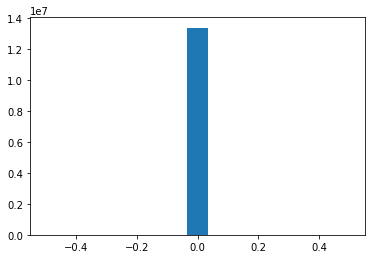

In [79]:
plt.hist(y_pred[:,1], bins=15)
plt.show()

In [155]:
sample = pd.read_csv(os.path.join(dir_path, "01_01_2020_projection.csv"))

In [156]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  
0  84.65642 -179.95332  01_01_2020  NaN  
1  83.95421 -179.95332  01_01_2020  NaN  
2  83.32521 -179.95332  01_01_2020  NaN  
3  82.75034 -179.95332  01_01_2020  NaN  
4  82.21760 -179.95332  01_01_2020  NaN

In [157]:
temp = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [158]:
X_sample = sample[['snow_temp', 'soil_temp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'lat', 'lon', 'bulk_density']]

In [159]:
X_sample.head()

snow_temp  soil_temp  omega  Tbh  Tbv  cf   h       lat        lon  \
0        NaN        NaN    NaN  NaN  NaN NaN NaN  84.65642 -179.95332   
1        NaN        NaN    NaN  NaN  NaN NaN NaN  83.95421 -179.95332   
2        NaN        NaN    NaN  NaN  NaN NaN NaN  83.32521 -179.95332   
3        NaN        NaN    NaN  NaN  NaN NaN NaN  82.75034 -179.95332   
4        NaN        NaN    NaN  NaN  NaN NaN NaN  82.21760 -179.95332   

   bulk_density  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [160]:
X_sample_scaled = pd.DataFrame(scaler.transform(X_sample), columns=X_sample.columns)

In [161]:
y_sample_pred = model6.predict(X_sample_scaled, batch_size=batch_size, callbacks=callbacks_list, verbose=1)

12525/12525 [==============================] - 32s 3ms/step


In [162]:
y_sample_pred[:10,0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

### Results and Plots

#### Snow Density

In [128]:
mae = mean_absolute_error(y_test['snow_density'], y_pred[:,0])
mae

18.948446075472997

In [129]:
mse = mean_squared_error(y_test['snow_density'], y_pred[:,0])
mse

833.4437107422144

In [130]:
rmse = mse**(1/2.0)
rmse

28.869425188981758

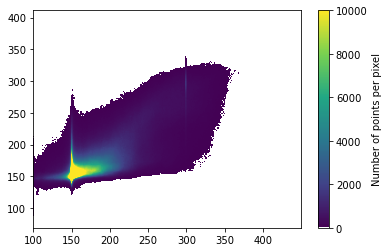

In [131]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['snow_density'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [132]:
temp["snow_density"] = y_sample_pred[:,0]

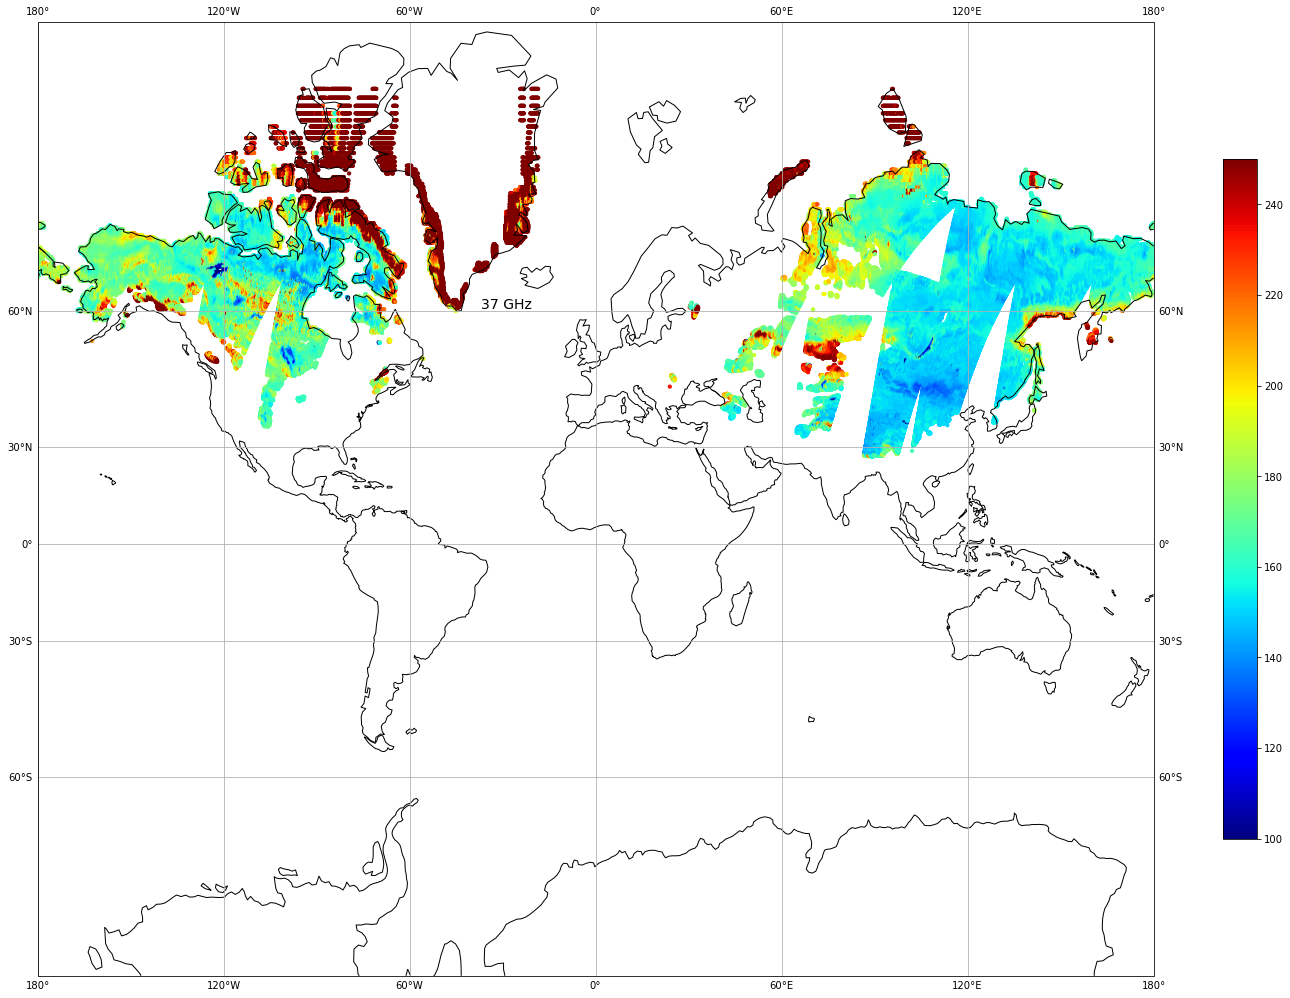

In [133]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(temp["lon"], temp["lat"], c=temp["snow_density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

In [243]:
sample.head()

snow_density  snow_temp  soil_temp  omega  Tbh  Tbv  cf   h  bulk_density  \
0           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
1           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
2           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
3           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   
4           NaN        NaN        NaN    NaN  NaN  NaN NaN NaN           NaN   

        lat        lon        date  vod  snow_density_pred  \
0  84.65642 -179.95332  01_01_2020  NaN                NaN   
1  83.95421 -179.95332  01_01_2020  NaN                NaN   
2  83.32521 -179.95332  01_01_2020  NaN                NaN   
3  82.75034 -179.95332  01_01_2020  NaN                NaN   
4  82.21760 -179.95332  01_01_2020  NaN                NaN   

   snow_density_pred_difference  snow_density_pred_r2  
0                           NaN                   NaN  
1                           NaN                   NaN  
2                           NaN                   NaN  
3                           NaN                   NaN  
4                           NaN                   NaN

In [203]:
sample["snow_density_pred"] = y_sample_pred[:,0]

In [205]:
sample["snow_density_pred_difference"] = sample["snow_density"] - sample["snow_density_pred"]

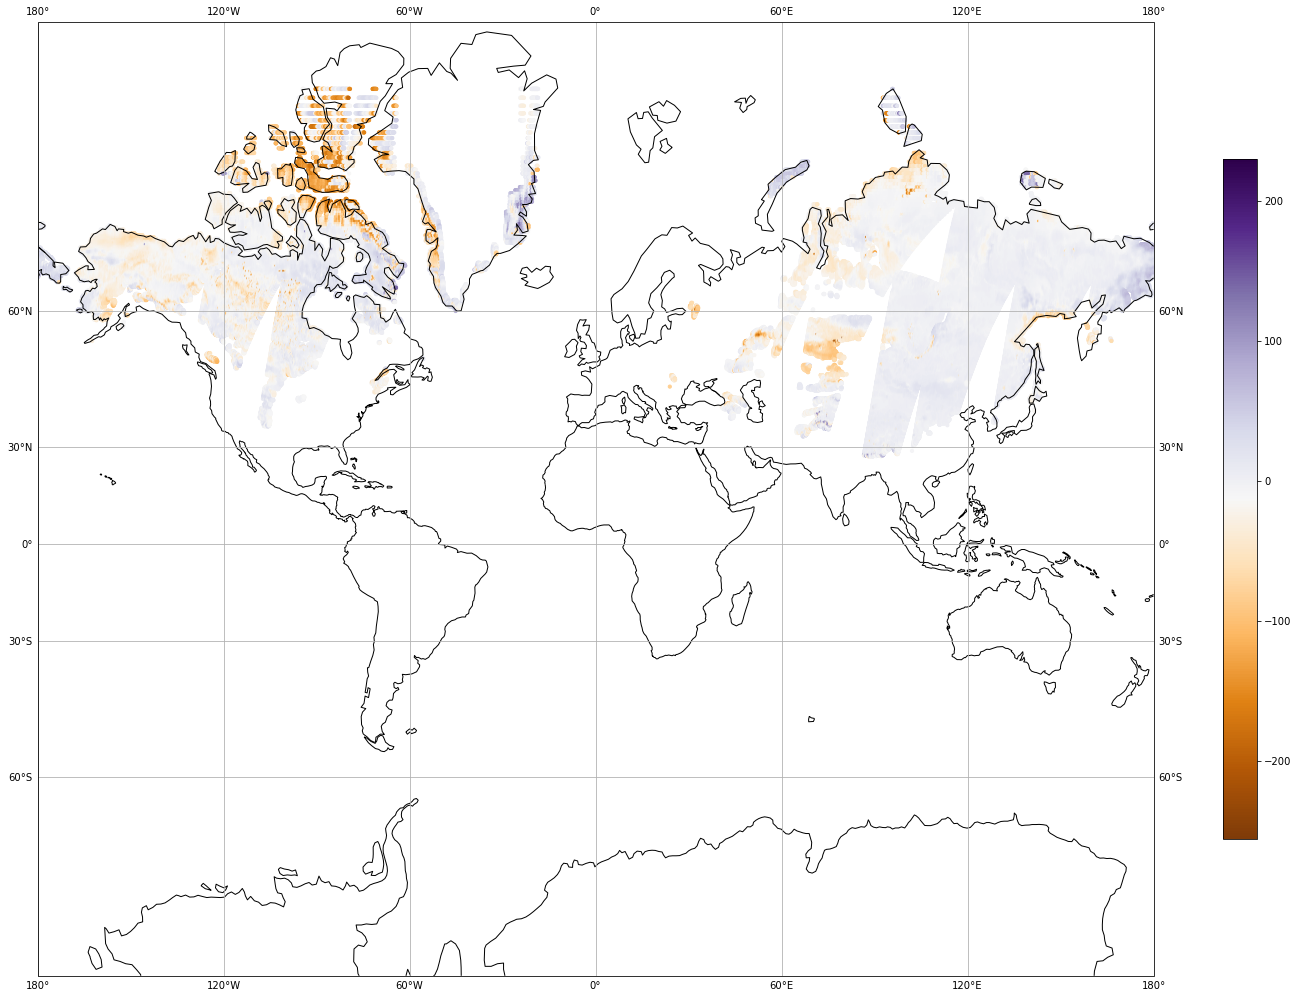

In [254]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(sample["lon"], sample["lat"], c=sample["snow_density_pred_difference"], cmap='PuOr', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
cbar = plt.colorbar(plot1, shrink = .5)

In [264]:
test.head()

snow_density  snow_temp  soil_temp     omega       Tbh       Tbv  \
18329587    179.471841  -0.750608   0.895647  0.313434  0.321851  0.300468   
18329588    176.776952  -0.730265   0.823541  0.413870  0.099469 -0.061708   
18329589    181.312867  -0.816404   0.325752  0.407721  0.305540  0.418985   
18329590    183.489251  -0.852478   0.589527  0.369116  0.403837  0.534498   
18329591    182.247955  -0.985826  -0.194500  0.408846 -0.033579 -0.060477   

                cf         h  bulk_density       lat       lon        date  \
18329587 -0.031529  0.740869     -1.750119  0.747724 -1.818588  01_01_2020   
18329588  0.311154  0.560089     -1.455303  0.733888 -1.818588  01_01_2020   
18329589 -0.101600  0.585237     -1.283617  0.747724 -1.815982  01_01_2020   
18329590 -0.379240  0.724243     -1.474913  0.761629 -1.815114  01_01_2020   
18329591  0.652284  0.391080     -0.874631  0.720118 -1.813377  01_01_2020   

               vod  snow_density_pred  
18329587  0.136579         166.366257  
18329588  0.371299         163.113800  
18329589  1.187509         175.454971  
18329590  0.367274         172.978180  
18329591  0.243427         177.856491

In [262]:
y_pred

array([[166.36626],
       [163.1138 ],
       [175.45497],
       ...,
       [201.12283],
       [199.2568 ],
       [201.77473]], dtype=float32)

In [263]:
test["snow_density_pred"] = y_pred

In [273]:
def compute_r2(g):
    r2 = r2_score(g['snow_density'], g['snow_density_pred'])
    return pd.Series(r2)

In [275]:
plot = test.groupby(['lat', 'lon']).apply(compute_r2).reset_index()

In [278]:
plot.head()

lat       lon           r2
0 -10.115475 -0.940518          NaN
1 -10.104146 -0.942255 -2098.155021
2 -10.104146 -0.941386  -750.568966
3 -10.104146 -0.937912 -1429.438185
4 -10.104146 -0.937044 -1387.974139

In [277]:
plot.rename( columns={0:'r2'}, inplace=True )

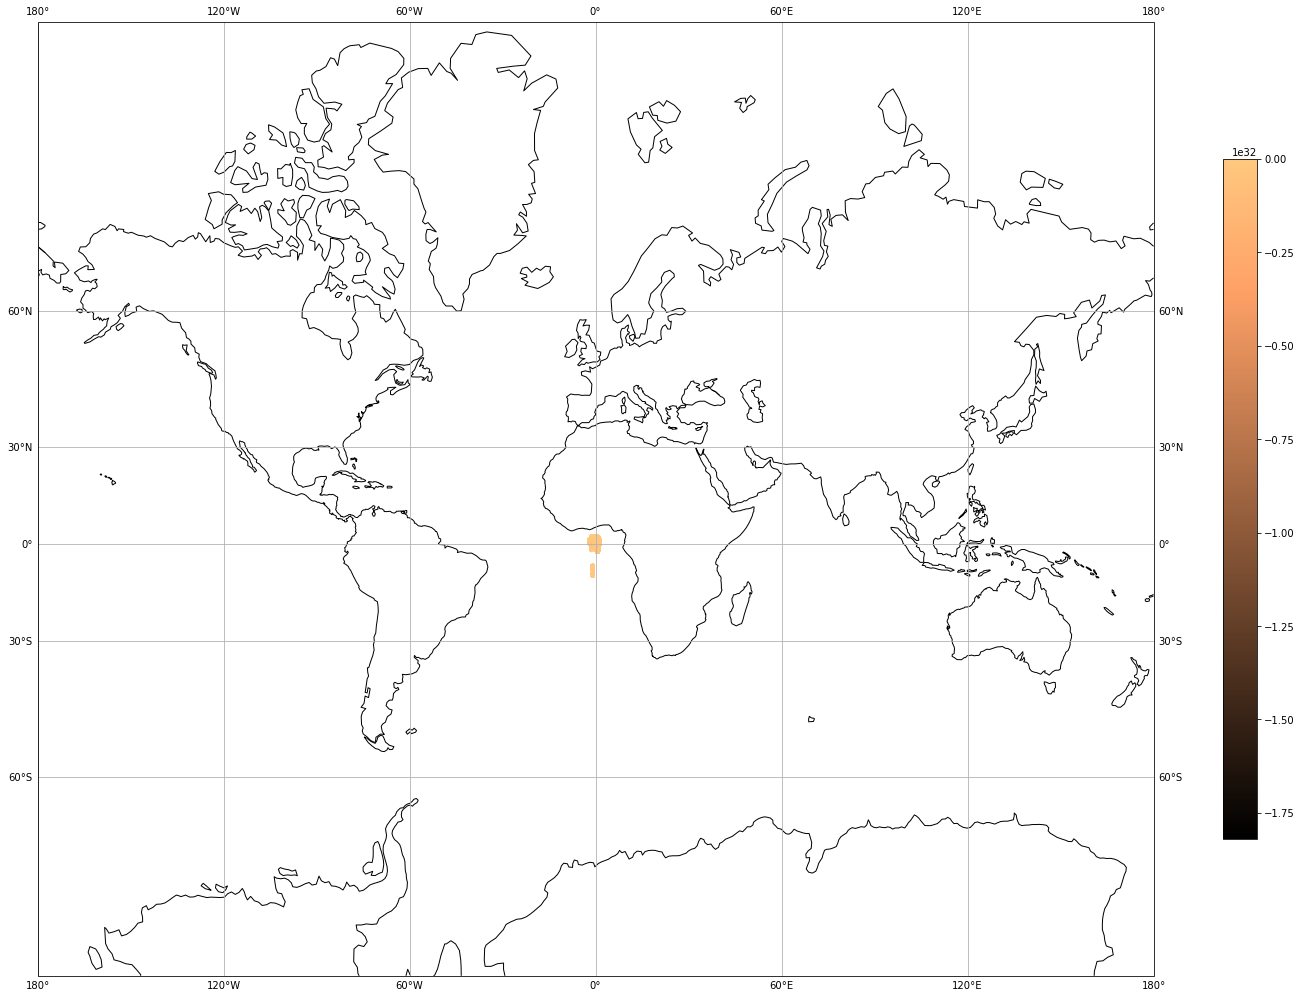

In [279]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(plot["lon"], plot["lat"], c=plot["r2"], cmap='copper', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
#ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

#### VOD

In [163]:
mae = mean_absolute_error(y_test['vod'], y_pred[:,0])
mae

0.0918988668046337

In [164]:
mse = mean_squared_error(y_test['vod'], y_pred[:,0])
mse

0.0329102239602164

In [165]:
rmse = mse**(1/2.0)
rmse

0.18141175254160466

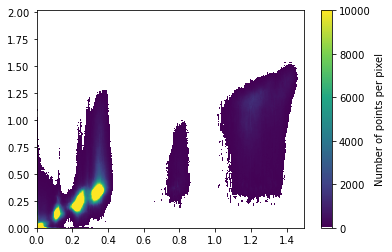

In [167]:
fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test['vod'], y_pred[:,0], cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [168]:
temp["vod"] = y_sample_pred[:,0]

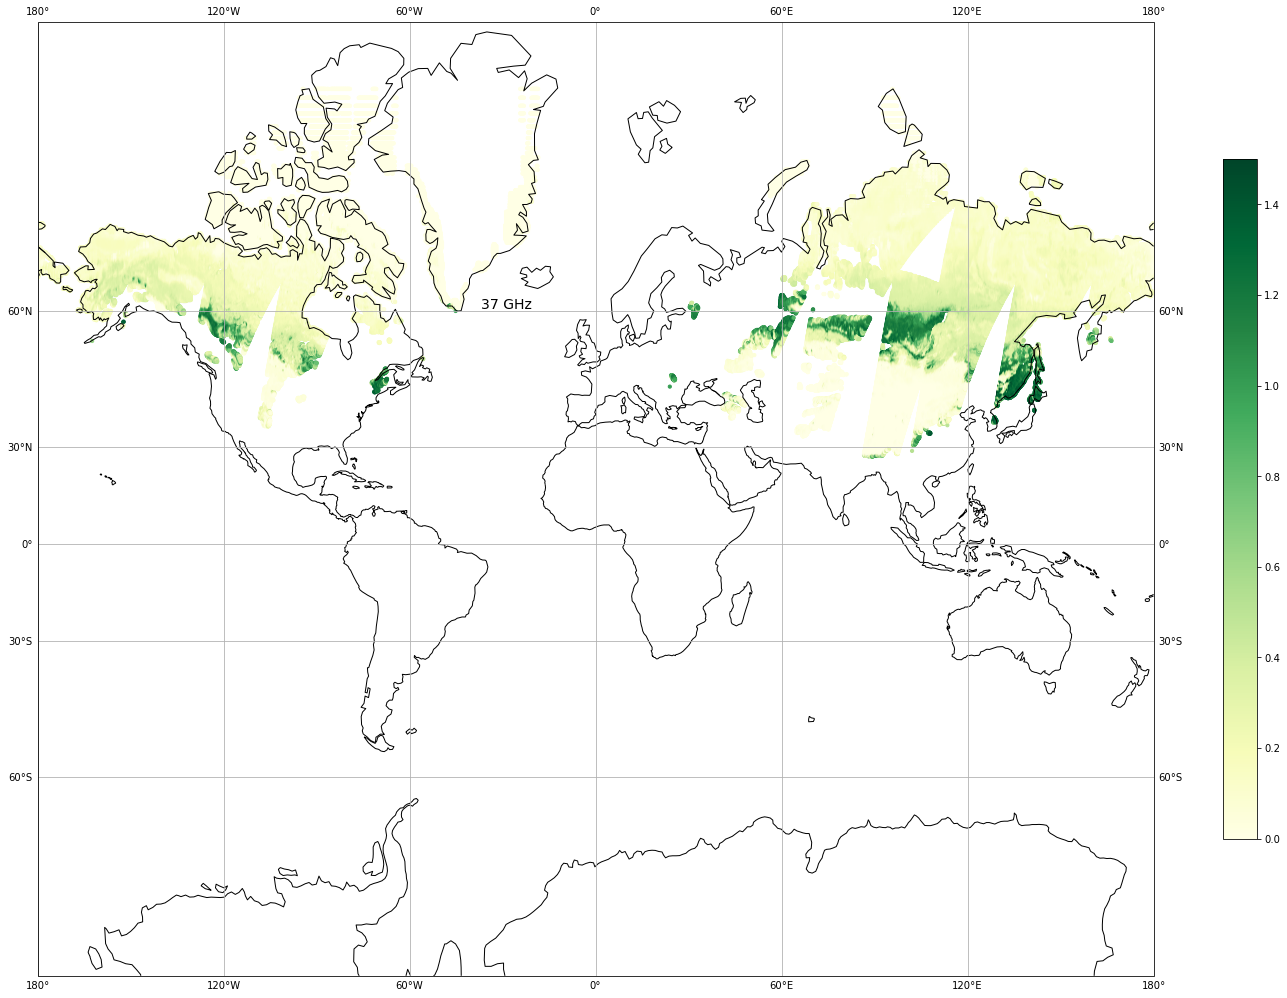

In [169]:
# %% Visualizing The data
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(temp["lon"], temp["lat"], c=temp["vod"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)